# Credit EDA Case Study

#### Performed by - Rohit Lal & Monica Fatwani

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from matplotlib.ticker import StrMethodFormatter

In [2]:
# Setting disply max columns and max rows to properly view dataframe with large number of columns
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

### Reading Application Dataset

In [3]:
# Reading application dataset csv
df=pd.read_csv("application_data.csv")

In [4]:
# Checking shape of the datset
df.shape

(307511, 122)

In [5]:
# Checking column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# viewing head of dataframe, i.e, first 5 rows.
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Checking for missing values in columns

In [7]:
# Checking % missing values in each column -- sorted in descending order of missing values
(df.isnull().mean() * 100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [8]:
# keeping only those columns having <= 40 % null values (i.e, having atleast 60% data values)
df = df.loc[:, df.isnull().mean() <= 0.4]

In [9]:
# Remaining df shape
df.shape

(307511, 73)

### Check if imputing of values is required on remaining columns

In [10]:
# Checking top 20 columns having null values
(df.isnull().mean() * 100).sort_values(ascending=False)[:20]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
dtype: float64

#### Analysing AMT_ANNUITY column

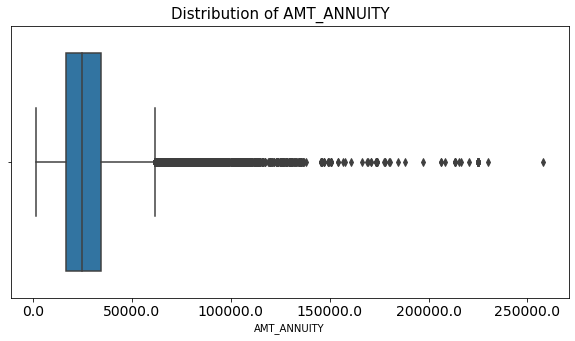

'Median: 24903.0'

In [11]:
plt.figure(figsize=(10, 5))

p = sns.boxplot(df['AMT_ANNUITY'])
plt.figtext(.5,.9,'Distribution of AMT_ANNUITY', fontsize=15, ha='center')
p.set_xticklabels(p.get_xticks(), size = 14)

plt.show()

'Median: %s' % df['AMT_ANNUITY'].median()

- `AMT_ANNUITY` column is quite high numbers of outliers, so `mean` would not be an appropriate measure to estimate missing values. 
- We can use `Median` to fill up the missing values

#### Checking AMT_GOODS_PRICE column

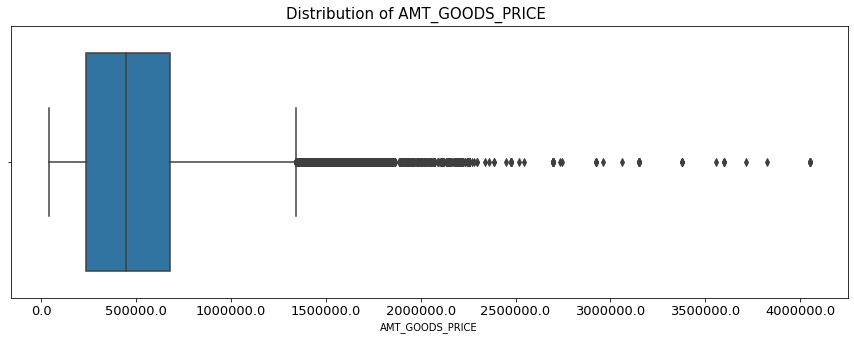

'Median: 450000.0'

In [12]:
plt.figure(figsize=(15, 5))

p = sns.boxplot(df['AMT_GOODS_PRICE'])
plt.figtext(.5,.9,'Distribution of AMT_GOODS_PRICE', fontsize=15, ha='center')
p.set_xticklabels(p.get_xticks(), size = 13)

plt.show()

'Median: %s' % df['AMT_GOODS_PRICE'].median()

- `AMT_GOODS_PRICE` column has quite high numbers of outliers. Again, `mean` would not be an appropriate measure.
- We can use `Median` to estimate the missing values

#### Checking EXT_SOURCE_2 column

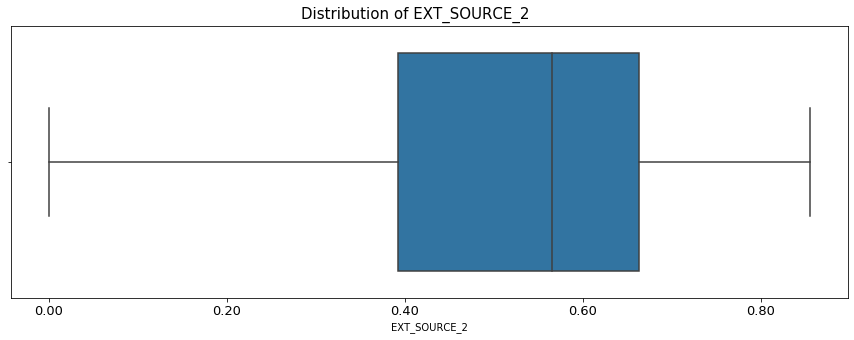

'Mean: 0.5143926741308462'

In [13]:
plt.figure(figsize=(15, 5))

p = sns.boxplot(df['EXT_SOURCE_2'])
plt.figtext(.5,.9,'Distribution of EXT_SOURCE_2', fontsize=15, ha='center')
p.set_xticklabels(p.get_xticks(), size = 13)
p.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

plt.show()

'Mean: %s' % df['EXT_SOURCE_2'].mean()

- `EXT_SOURCE_2` column do not have any outliers.
- So, `Mean` can be used to estimate the missing values

#### Checking EXT_SOURCE_3 column

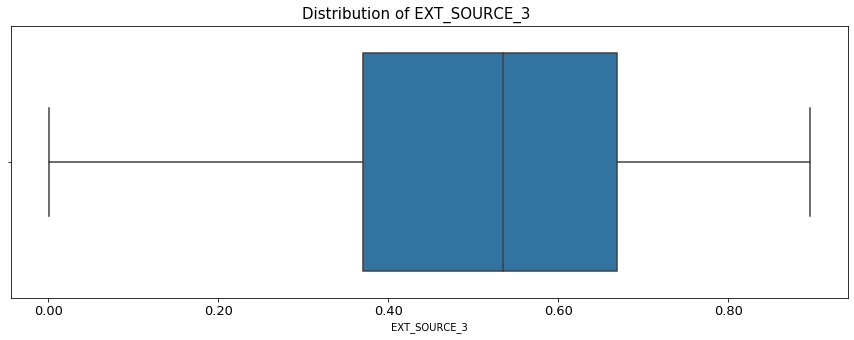

'Mean: 0.5108529061799658'

In [14]:
plt.figure(figsize=(15, 5))

p = sns.boxplot(df['EXT_SOURCE_3'])
plt.figtext(.5,.9,'Distribution of EXT_SOURCE_3', fontsize=15, ha='center')
p.set_xticklabels(p.get_xticks(), size = 13)
p.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

plt.show()

'Mean: %s' % df['EXT_SOURCE_3'].mean()

- `EXT_SOURCE_3` column do not have any outliers.
- So, `Mean` can be used to estimate the missing values

#### Checking NAME_TYPE_SUITE column

In [15]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [16]:
'Mode: %s' % df.NAME_TYPE_SUITE.mode().values[0]

'Mode: Unaccompanied'

- `NAME_TYPE_SUITE` is categorical columns.
- Since, very small number of rows are missing. We can impute those values by the MODE value.

#### Checking CNT_FAM_MEMBERS column

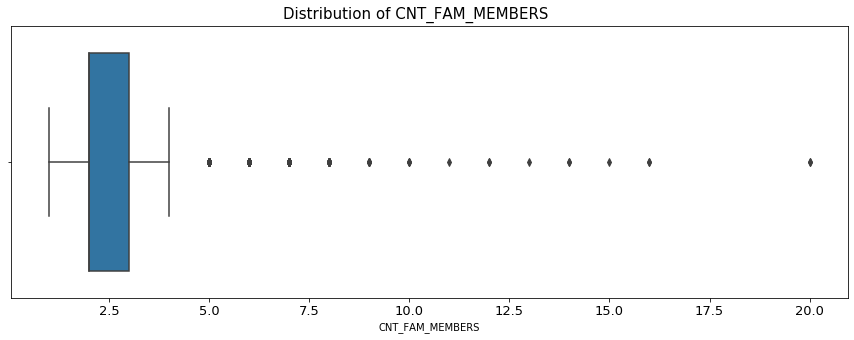

Median: 2.0


In [17]:
plt.figure(figsize=(15, 5))

p = sns.boxplot(df['CNT_FAM_MEMBERS'])
plt.figtext(.5,.9,'Distribution of CNT_FAM_MEMBERS', fontsize=15, ha='center')
p.set_xticklabels(p.get_xticks(), size = 13)

plt.show()

print('Median: %s' % df['CNT_FAM_MEMBERS'].median())

- `CNT_FAM_MEMBERS` column has outliers. 
- We can replace the missing count family members by `0`, assuming NULL values signify no children or,
- `Median` can also be used to impute, 

#### Checking CODE_GENDER column

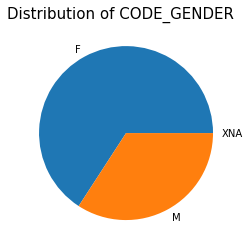

In [18]:
plt.figtext(.5,.9,'Distribution of CODE_GENDER', fontsize=15, ha='center')
gender_value_counts = df.CODE_GENDER.value_counts(normalize=True)

gender_value_counts.plot.pie(
    labels=gender_value_counts.index
)
plt.ylabel('')
plt.show()

In [19]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

- There are 4 XNA values, which we can drop from the dataset, since missing value count is negligible.

In [20]:
df = df.loc[df.CODE_GENDER != 'XNA', :]

### Checking and correcting column data type issues.

In [21]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307229 non-null  float64
 11  NAME_TYPE_SUITE              306215 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

##### Taking absolute of the column values.

In [23]:
df.DAYS_BIRTH = df.DAYS_BIRTH.abs()

In [24]:
df.DAYS_REGISTRATION = df.DAYS_REGISTRATION.abs()

In [25]:
df.DAYS_ID_PUBLISH = df.DAYS_ID_PUBLISH.abs()

In [26]:
df.DAYS_LAST_PHONE_CHANGE = df.DAYS_LAST_PHONE_CHANGE.abs().fillna(0).astype('int')

In [27]:
df.CNT_FAM_MEMBERS = df.CNT_FAM_MEMBERS.fillna(0).astype('int')

### Checking for Outliers

#### Checking outliers in AMT_INCOME_TOTAL

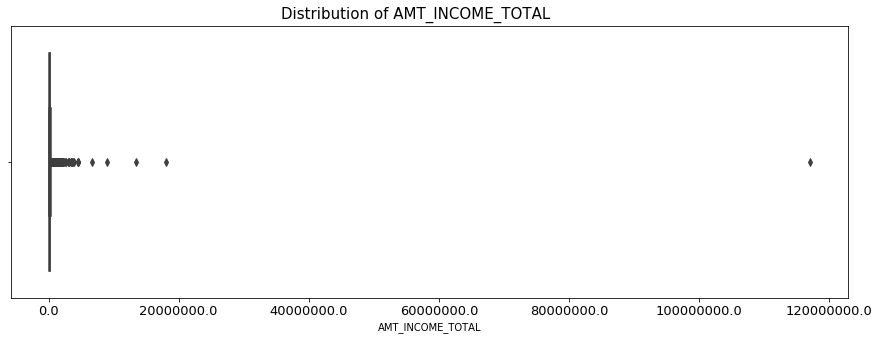

In [28]:
plt.figure(figsize=(15, 5))

p = sns.boxplot(df.AMT_INCOME_TOTAL)
plt.figtext(.5,.9,'Distribution of AMT_INCOME_TOTAL', fontsize=15, ha='center')
p.set_xticklabels(p.get_xticks(), size = 13)

plt.show()

- AMT_INCOME_TOTAL column has outliers. 
- These outliers will be due to some high salaried clients in comparison to average lower salaried clients 

#### Checking outliers in AMT_CREDIT

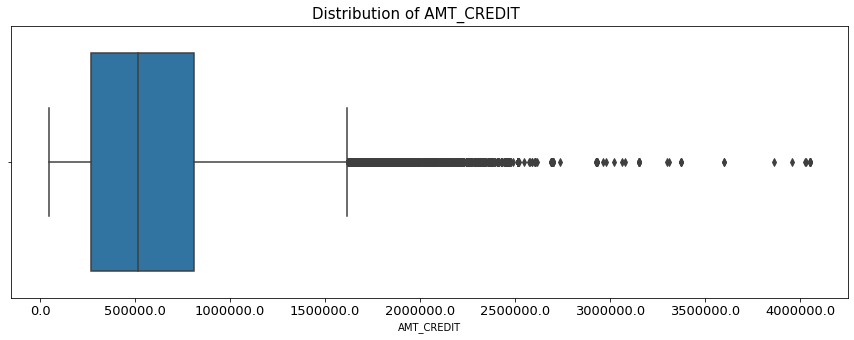

In [29]:
plt.figure(figsize=(15, 5))

plt.figtext(.5,.9,'Distribution of AMT_CREDIT', fontsize=15, ha='center')
p = sns.boxplot(df.AMT_CREDIT)
p.set_xticklabels(p.get_xticks(), size = 13)

plt.show()

- AMT_CREDIT column also has Outliers. 
- These outliers will be due to the few exceptionally large amounts of loans.

#### Checking outliers in AMT_ANNUITY

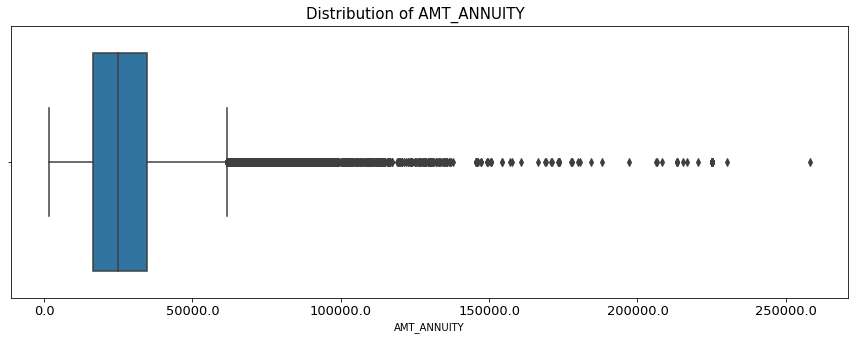

In [30]:
plt.figure(figsize=(15, 5))

plt.figtext(.5,.9,'Distribution of AMT_ANNUITY', fontsize=15, ha='center')
p = sns.boxplot(df.AMT_ANNUITY)
p.set_xticklabels(p.get_xticks(), size = 13)

plt.show()

- AMT_ANNUITY column has outliers. 
- These outliers will be due to the high annuity amounts for some large loans

#### Checking outliers in AMT_GOODS_PRICE

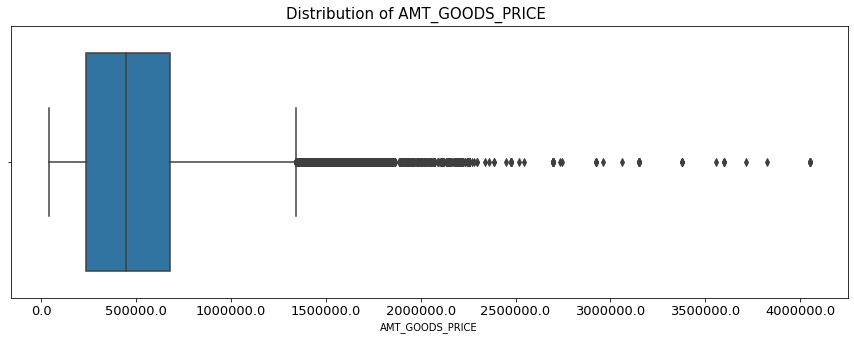

In [31]:
plt.figure(figsize=(15, 5))

plt.figtext(.5,.9,'Distribution of AMT_GOODS_PRICE', fontsize=15, ha='center')
p = sns.boxplot(df.AMT_GOODS_PRICE)
p.set_xticklabels(p.get_xticks(), size = 13)

plt.show()

- AMT_GOODS_PRICE column also has Outliers. 
- These outliers will be due to the some high priced goods in the loan

#### Checking outliers in REGION_POPULATION_RELATIVE

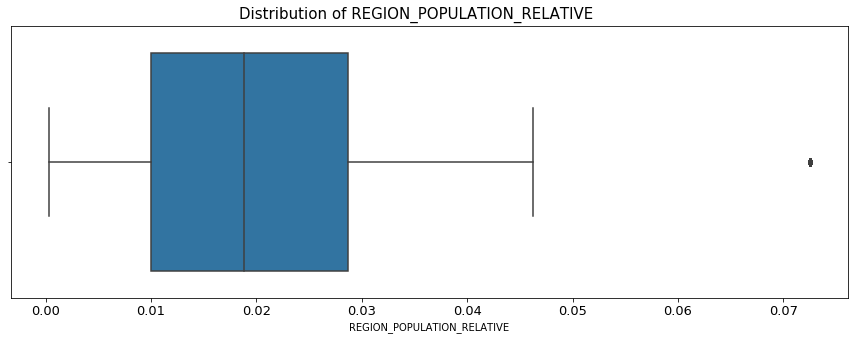

In [32]:
plt.figure(figsize=(15, 5))

plt.figtext(.5,.9,'Distribution of REGION_POPULATION_RELATIVE', fontsize=15, ha='center')
p = sns.boxplot(df.REGION_POPULATION_RELATIVE)
p.set_xticklabels(p.get_xticks(), size = 13)
p.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

plt.show()

- REGION_POPULATION_RELATIVE columns has very few outliers
- Outliers signify high populated locations.

### Binning Continuous variables

- In order to do further analysis, we will bin the continuous variables in the dataset.

#### Binning Income Column

In [33]:
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 10000000000]
slot = ['0-50000','50000-100000','100000-150000', '150000-200000', '200000-250000','250000-300000',
        '300000-350000', '350000-400000','400000-450000','450000-500000','500000 and above']

df['AMT_INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'], bins, labels=slot)

#### Binning CREDIT_RANGE Column

In [34]:
bins = [0, 200000, 500000, 1000000, 5000000, 10000000]
slot = ['0-200000', '200000-500000', '500000-1000000', '1000000-5000000', '>5000000']

df['AMT_CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'], bins, labels=slot)

##### Binning EXT_SOURCE_2 column

In [35]:
bins = [0,0.20,0.50,0.90,1]
slot = ['Low','Medium','High','Very_high']

df.loc[:,'EXT_RATING_2'] = pd.qcut(df.loc[:,'EXT_SOURCE_2'], q=bins, labels=slot)

##### Binning EXT_SOURCE_3 column

In [36]:
bins = [0,0.20,0.50,0.90,1]
slot = ['Low','Medium','High','Very_high']

df.loc[:,'EXT_RATING_3'] = pd.qcut(df.loc[:,'EXT_SOURCE_3'], q=bins, labels=slot)

##### Binning CNT_FAM_MEMBERS column

In [37]:
bins = [0, 2, 5, 10, 100]
slot = ['less than 3', '3 to 5', '6 to 10','greater than 10']

df['CNT_FAM_MEMBERS_RANGE'] = pd.cut(df['CNT_FAM_MEMBERS'], bins, labels=slot)

##### Binning CNT_CHILDREN column

In [38]:
bins = [-1, 1, 3, 5, 10, 100]
slot = ['0-1', '2-3', '4-5', '6-10','>10']

df['CNT_CHILDREN_RANGE'] = pd.cut(df.CNT_CHILDREN, bins, labels=slot)

### Choosing prime columns as per understanding and relevance 

In [39]:
# Dropping irrelevant columns
columns_to_drop = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 
    'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL',
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 
    'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
    'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'NAME_TYPE_SUITE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 
    'REG_CITY_NOT_LIVE_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
]

df.drop(labels=columns_to_drop,axis=1, inplace=True)

In [40]:
# Checking remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307507 non-null  int64   
 1   TARGET                      307507 non-null  int64   
 2   NAME_CONTRACT_TYPE          307507 non-null  object  
 3   CODE_GENDER                 307507 non-null  object  
 4   FLAG_OWN_CAR                307507 non-null  object  
 5   FLAG_OWN_REALTY             307507 non-null  object  
 6   CNT_CHILDREN                307507 non-null  int64   
 7   AMT_INCOME_TOTAL            307507 non-null  float64 
 8   AMT_CREDIT                  307507 non-null  float64 
 9   AMT_ANNUITY                 307495 non-null  float64 
 10  AMT_GOODS_PRICE             307229 non-null  float64 
 11  NAME_INCOME_TYPE            307507 non-null  object  
 12  NAME_EDUCATION_TYPE         307507 non-null  object  
 13 

### Checking imbalance percentage

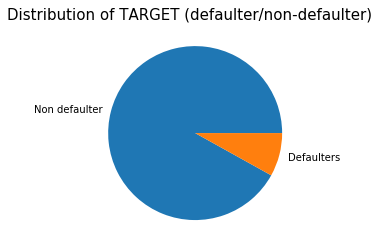

In [41]:
plt.figtext(.5,.9,'Distribution of TARGET (defaulter/non-defaulter)', fontsize=15, ha='center')

target_value_counts = df.TARGET.value_counts(normalize=True)
target_value_counts.plot.pie(
    labels=['Non defaulter', 'Defaulters']
)
plt.ylabel('')
plt.show()

In [42]:
print('Target == 1 (i.e, Non defaulted) : {} % \nTarget == 0 (i.e, Defaulted) : {} %'.format(
    (100 * df.TARGET.value_counts(normalize=True))[1].round(2), (100 * df.TARGET.value_counts(normalize=True))[0].round(2)
))

Target == 1 (i.e, Non defaulted) : 8.07 % 
Target == 0 (i.e, Defaulted) : 91.93 %


- We can clearly see the dataset is `imbalanced`.
- Percentage of data for `Defaulters` is very less as compared to the percentage of data for `non-defaulters`

### Dividing data into 2 parts - defaulted & not defaulted (as per TARGET variabel)

In [43]:
defaulted_df = df.loc[df.TARGET == 1, :]
not_defaulted_df = df.loc[df.TARGET == 0, :]

## Univariate Analysis

Now, lets do some Univariate analysis on the dataset to get more inferences

##### Continuous Variables

In [44]:
def visualize_box_plot_1col(column_name):
        
    fig, ax =plt.subplots(1,2, figsize=(10,5), sharey=True)
    plt.subplots_adjust(wspace=0.6)
    
    sns.boxplot(y=column_name, data=not_defaulted_df, ax=ax[0])
    sns.boxplot(y=column_name, data=defaulted_df, ax=ax[1])

    ax[0].set_xlabel('For Non-Defaulters'.format(column_name), fontsize = 13)
    ax[1].set_xlabel('For Defaulters'.format(column_name), fontsize = 13)
    
    ax[0].set_ylabel('{}'.format(column_name), fontsize = 13)
    ax[1].set_ylabel('{}'.format(column_name), fontsize = 13)
    
    fig.suptitle('Distribution of {} across TARGET variable'.format(column_name), fontsize=20)
    
    plt.show()

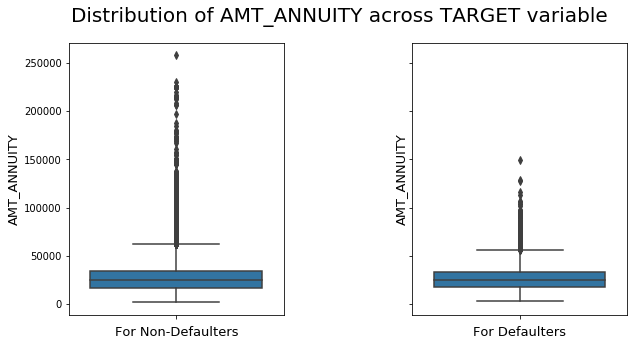

In [45]:
visualize_box_plot_1col('AMT_ANNUITY')

- No strong comparison found in AMT_ANNUITY with the TARGET variable
- Non-defaulters have in generally loans with very high Annuity amounts (see, outliers in the above plot. Non-defaulters have very high magnitude of Outliers.)
- This can be due to the High Annuity loans are provided only to trusted people which are Non-defaulters

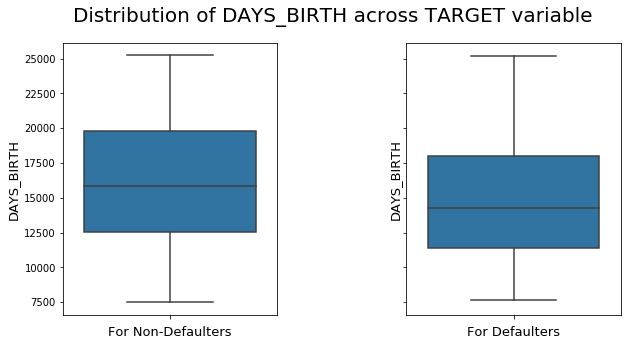

In [46]:
visualize_box_plot_1col('DAYS_BIRTH')

- Non-defaulters are in general more aged than the defaulters, since median lies slight above in case of Non-defaulters

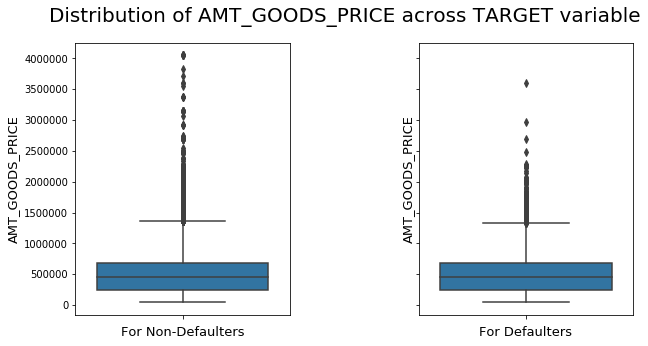

In [47]:
visualize_box_plot_1col('AMT_GOODS_PRICE')

- Non-defaulters have in generally loans with very high GOODS_PRICE amounts (see, outliers in the above plot. Non-defaulters have very high magnitude of Outliers.)
- This will be due to the High Goods price loans are provided only to trusted people which are Non-defaulters

##### Categorical Variables

In [48]:
def visualize_countplot_v(column_name):
    
    fig = plt.figure(figsize=(15,6))
    
    fig.suptitle('Distribution of {} across TARGET variable'.format(column_name), fontsize=20)
    
    plt.subplot(1, 2, 1)
    sns.countplot(column_name, data=not_defaulted_df.sort_values(column_name))
    plt.title('For Non-Defaulters', fontsize=14)
    plt.ylabel('Counts of non-defaulters', fontsize=13)
    plt.xlabel(column_name, fontsize=13)
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    sns.countplot(column_name, data=defaulted_df.sort_values(column_name))
    plt.title('For Defaulters', fontsize=14)
    plt.ylabel('Counts of defaulters', fontsize=13)
    plt.xlabel(column_name, fontsize=13)
    plt.xticks(rotation=90)
    
    plt.show()

In [49]:
def visualize_countplot_h(column_name):
    
    plt.figure(figsize=(12, 30))
    
    plt.subplot(2, 1, 1)
    sns.countplot(y=column_name, data=not_defaulted_df.sort_values(column_name))
    plt.title('Plotting {} for Non-Defaulters'.format(column_name), fontsize=14)
    plt.ylabel('Counts of non-defaulters', fontsize=13)
    plt.xlabel(column_name, fontsize=13)
    
    plt.subplot(2, 1, 2)
    sns.countplot(y=column_name, data=defaulted_df.sort_values(column_name))
    plt.title('Plotting {} for Defaulters'.format(column_name), fontsize=14)
    plt.ylabel('Counts of defaulters', fontsize=13)
    plt.xlabel(column_name, fontsize=13)
    
    plt.show()

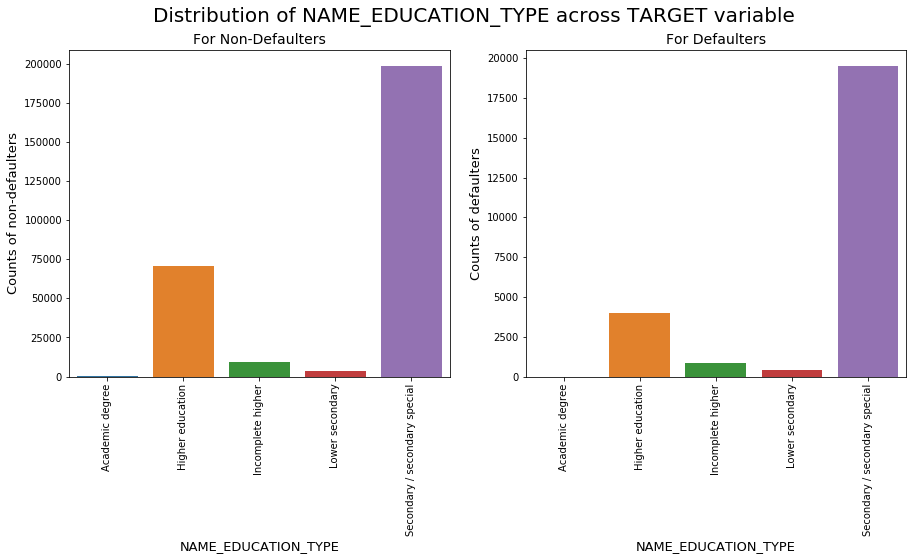

In [50]:
visualize_countplot_v('NAME_EDUCATION_TYPE')

- There is no strong relation between `NAME_EDUCATION_TYPE` & `TARGET` variable.
- In general, Education Type 'Secondary/Secondary Special' is highest and Education Type 'Academic degee' is least for both TARGET categories.

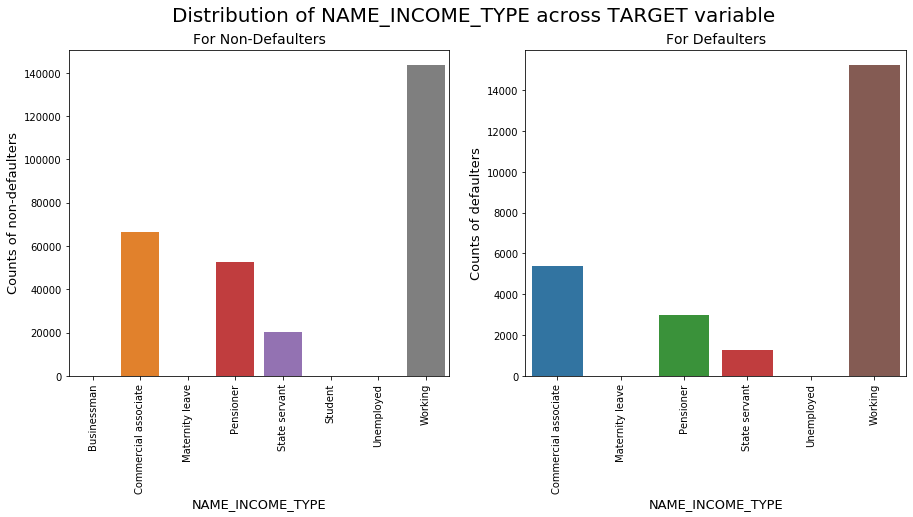

In [51]:
visualize_countplot_v('NAME_INCOME_TYPE')

- Working population is the one which applies most for the loans, and also it is the category which defaults the most.
- Commercial Associates are the 2nd most defaulters.

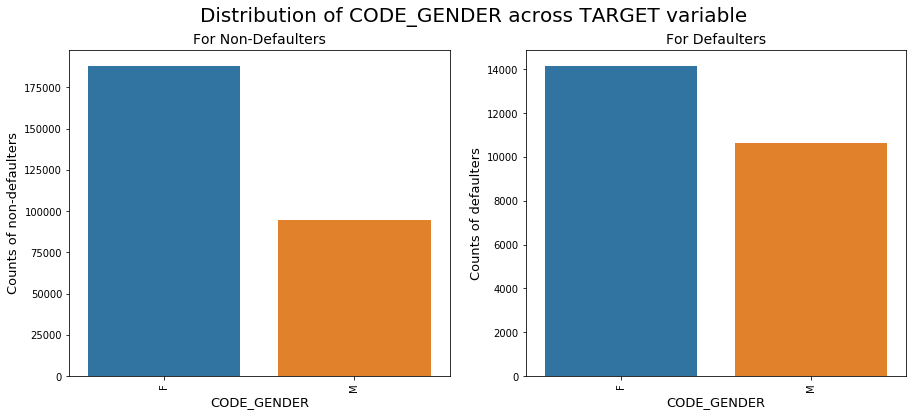

In [52]:
visualize_countplot_v('CODE_GENDER')

- Ratio of Female to Male in case of defaulters is comparitively less than that in case of Non-defaulters.

In [53]:
# CODE_GENDER
# plt.figure(figsize=(10, 5))
# ax = sns.countplot(x="TARGET", hue="CODE_GENDER", data=df)

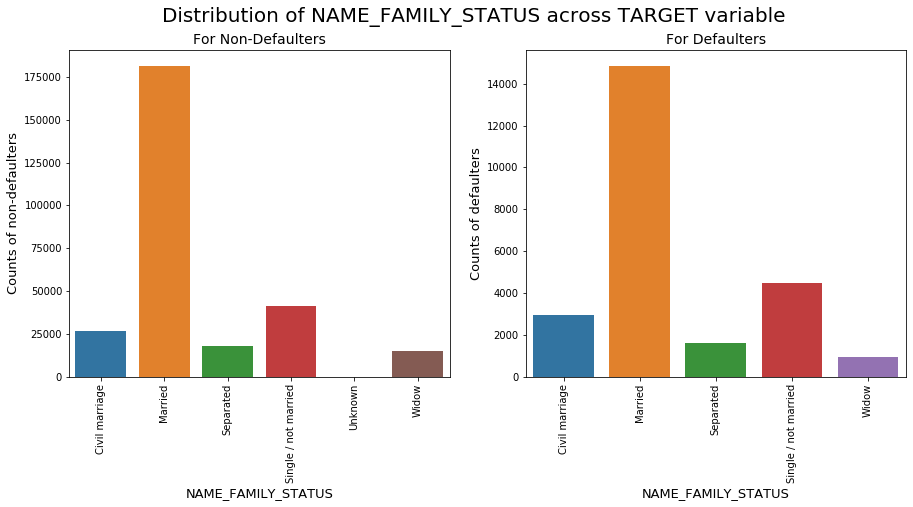

In [54]:
visualize_countplot_v('NAME_FAMILY_STATUS')

- Married people are at top in both defaulters and non-defaulters
- Not-married ratio in defaulters is comparitively higher that that of non defaulted population.

#### Ordered Categorical Variable

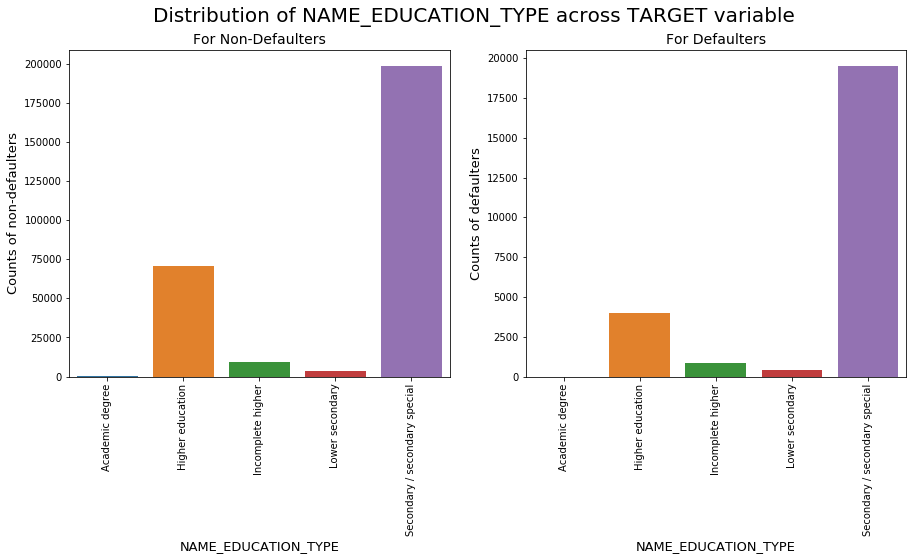

In [55]:
visualize_countplot_v('NAME_EDUCATION_TYPE')

- Higher Education ratio is comparitively lesser in case of Defaulters as compared to Non-defaulters.

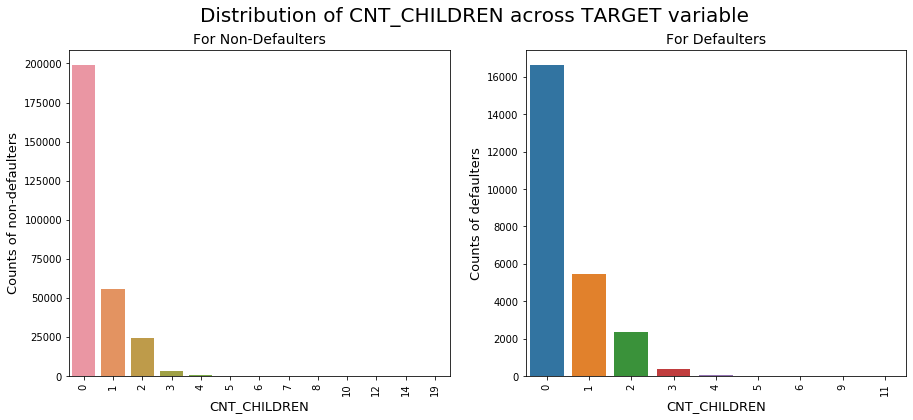

In [56]:
visualize_countplot_v('CNT_CHILDREN')

- There is not any visible relation between the children counts in defaulters vs not defaulters.

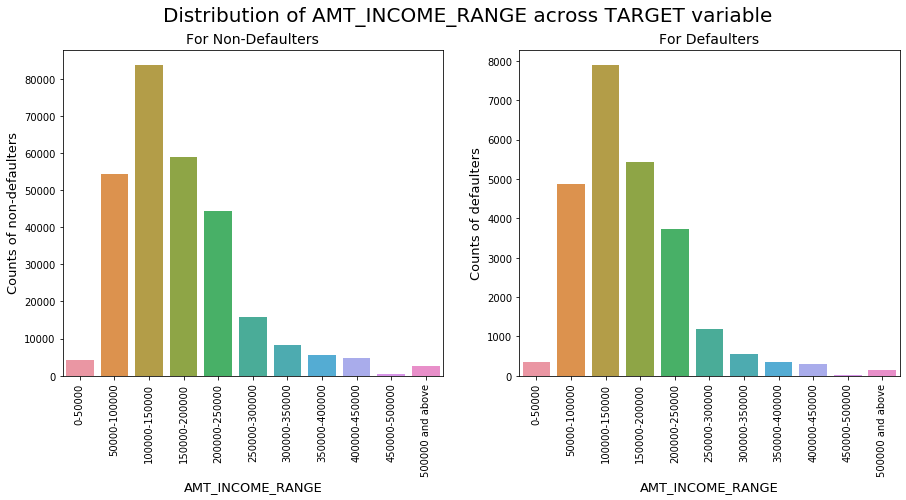

In [57]:
visualize_countplot_v('AMT_INCOME_RANGE')

- There is no strong relationship between INCOME_RANGE and TARGET variable
- In general, we have high count of applicants in income range 1-1.5L in both defaulters and non defaulters.

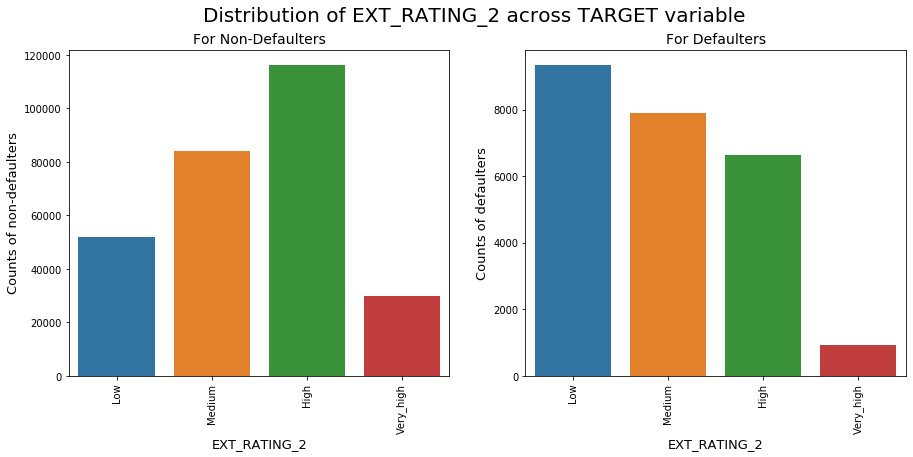

In [58]:
visualize_countplot_v('EXT_RATING_2')

- Low Ratings ratio in the Defaulters population is clearly higher as compared to the Non-defaulters population.
- EXT_RATING_2 shows strong relationship with our target variable (i.e, defaulters/non-defaulters)

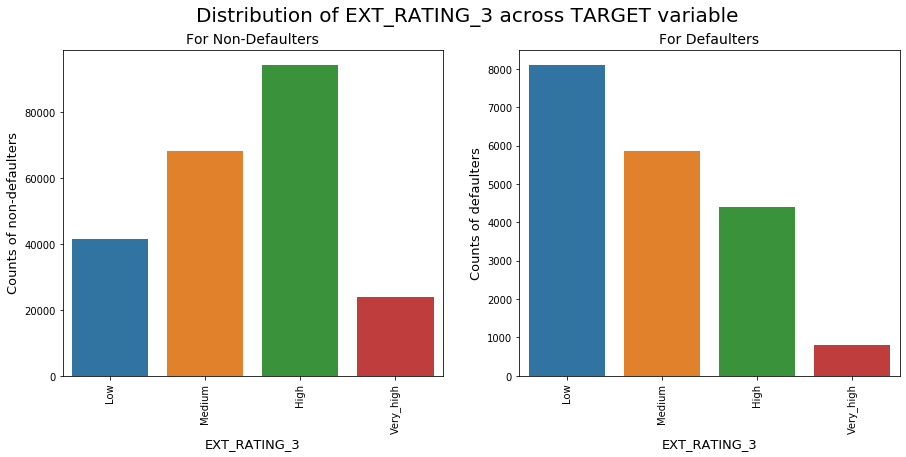

In [59]:
visualize_countplot_v('EXT_RATING_3')

- Low Ratings ratio in the Defaulters population is clearly higher as compared to the Non-defaulters population.
- EXT_RATING_3 also shows strong relationship with defaulters/non-defaulters.

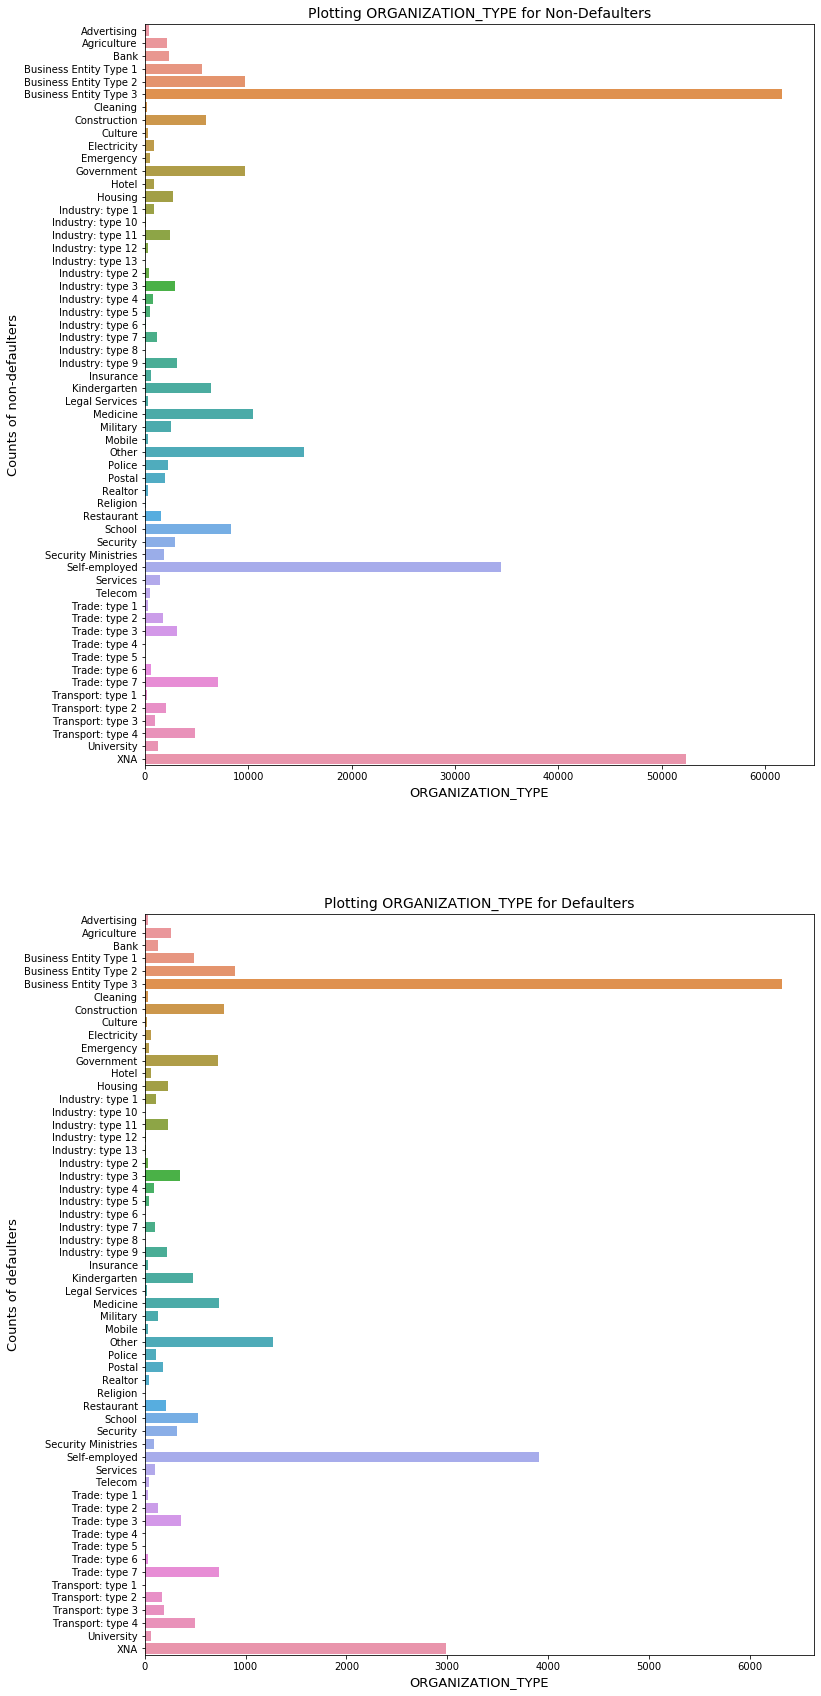

In [60]:
visualize_countplot_h('ORGANIZATION_TYPE')

- Clients who have applied for credit are from most of the organization_type `Business entity Type 3` , `Self employed`, `Other`, `Medicine`, `Trade:type 7`, `Business entity Type 2`, `Construction`.
- Less clients are from `Industry type 8`, `type 6`, `type 10`, `type 12`, `religion`, `culture` and `trade type 5`, `type 4`.
- `Government` organization type has more `non-defauter` counts.

### Finding Correlation

Finding Correlation between numerical variables.

In [61]:
defaulted_df_corr = defaulted_df.drop(columns='TARGET').corr(method='spearman')
not_defaulted_df_corr = not_defaulted_df.drop(columns='TARGET').corr(method='spearman')

##### Plotting Heatmap of correlations - for Non-Defaulters

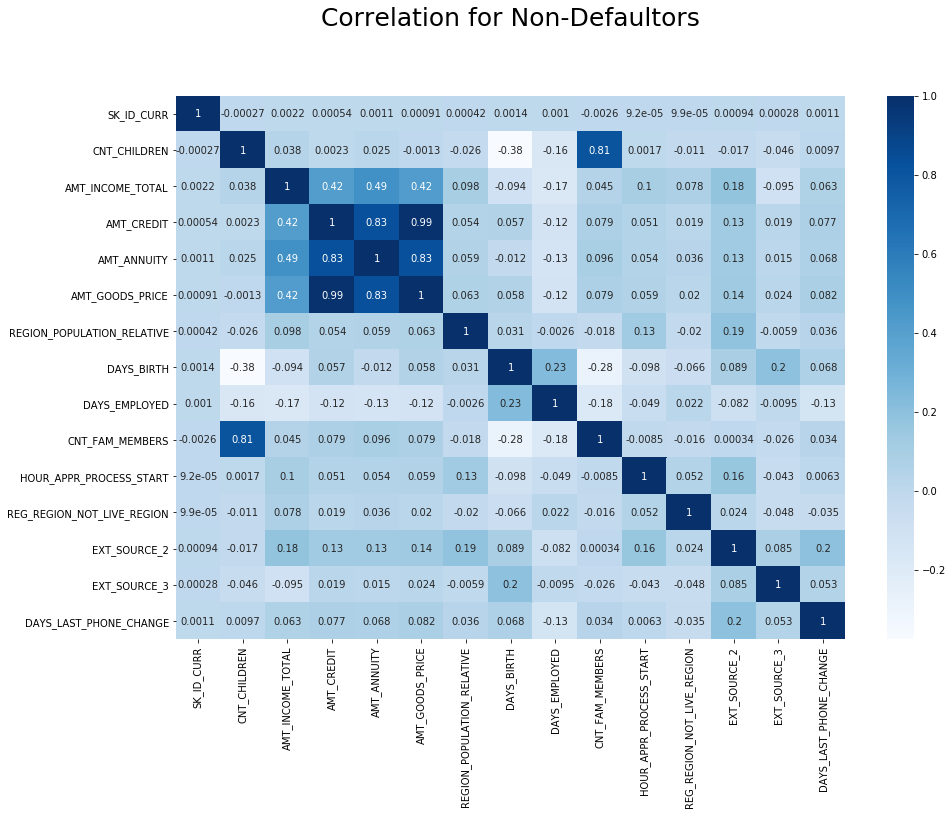

In [62]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
sns.heatmap(not_defaulted_df_corr, cmap="Blues",annot=True)
plt.title('Correlation for Non-Defaultors')
plt.yticks(rotation=0)
plt.show()

- Total income and Credit amount are strongly related. It means wealthy people take generally higher credit amounts.
- Credit Amount and Annuity are strong related. It is due the behaviour of business - For high credit amount loans, annuity will always be higher.
- Children count and Family member count shows strong relation. Again, it is due the behaviour of the variable. More children constitutes to more family members.
- Children and population density are also inversely related, means in densily populated region, clients have less children. This may due to space related constraints or some government body guidelines in dense regions.
- Credit amount and population density are positively related. It means denser areas constitute good credit amount.

##### Plotting Heatmap of correlations - for Defaulters

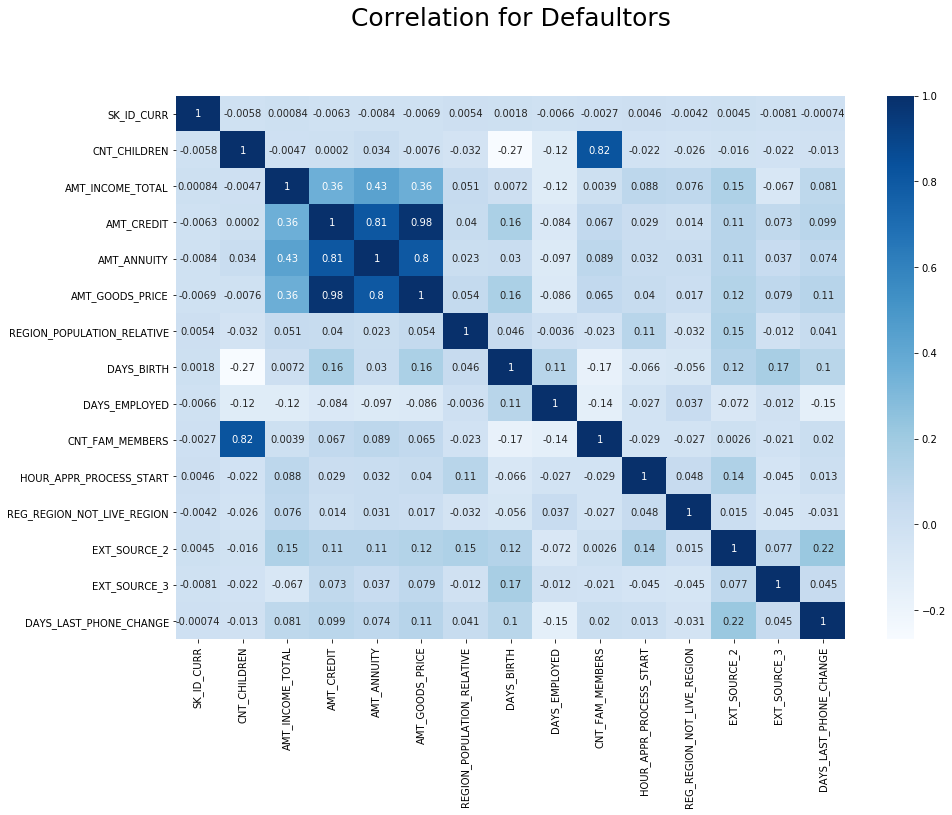

In [63]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
sns.heatmap(defaulted_df_corr, cmap="Blues",annot=True)
plt.title('Correlation for Defaultors')
plt.yticks(rotation=0)
plt.show()

**For Defaulters also, the prominent correlated variables are same as non-defaulters**

- Total income and Credit amount are strongly related. It means wealthy people take generally higher credit amounts.
- Credit Amount and Annuity are strong related. It is due the behaviour of business - For high credit amount loans, annuity will always be higher.
- Children count and Family member count shows strong relation. Again, it is due the behaviour of the variable. More children constitutes to more family members.
- Children and population density are also inversely related, means in densily populated region, clients have less children. This may due to space related constraints or some government body guidelines in dense regions.
- Credit amount and population density are positively related. It means denser areas constitute good credit amount.

## Bivariate analysis

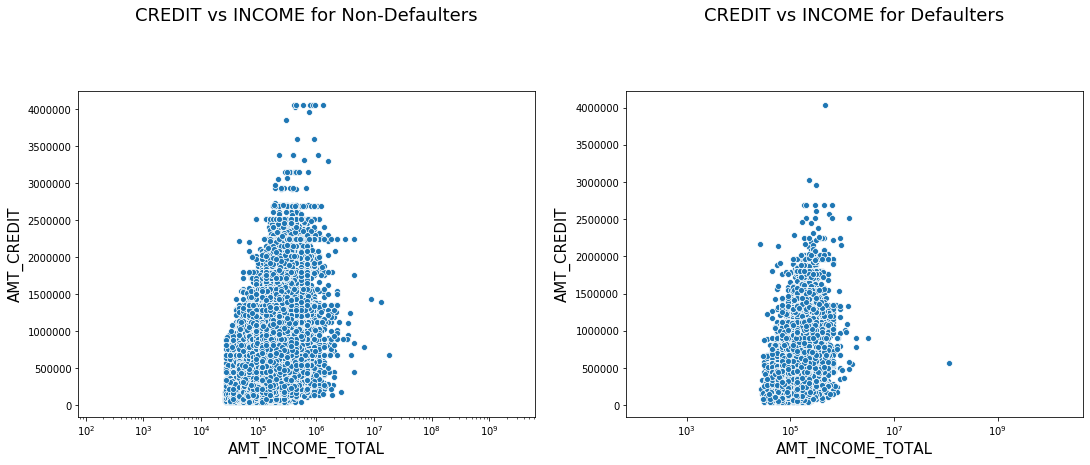

In [64]:
plt.figure(figsize = (18, 6))
ax = plt.subplot(1,2,1)

ax.set(xscale="log")
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=not_defaulted_df, ax= ax);
plt.title('CREDIT vs INCOME for Non-Defaulters', fontsize=18)
plt.ylabel('AMT_CREDIT', fontsize=15)
plt.xlabel('AMT_INCOME_TOTAL', fontsize=15)

ax = plt.subplot(1,2,2)
ax.set(xscale="log")
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=defaulted_df, ax= ax);
plt.title('CREDIT vs INCOME for Defaulters', fontsize=18)
plt.ylabel('AMT_CREDIT', fontsize=15)
plt.xlabel('AMT_INCOME_TOTAL', fontsize=15)

plt.show()

- Higher income candidates in general present in Non-defaulters population.
- Log Scale for INCOME_TOTAL in above plots is chosen to take care of outlier points.

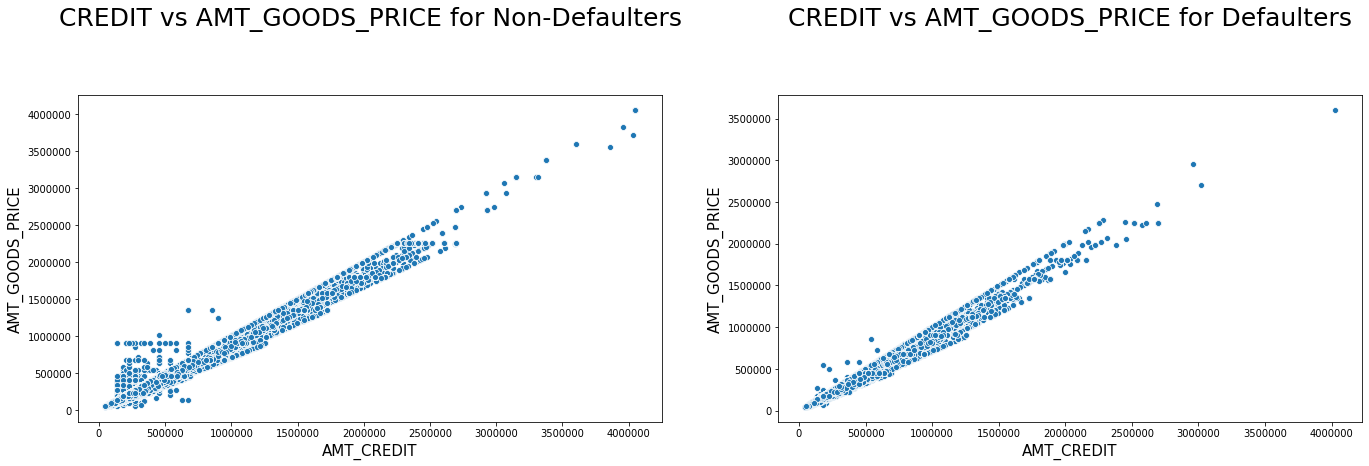

In [65]:
plt.figure(figsize = (23, 6))
ax = plt.subplot(1,2,1)

sns.scatterplot(x="AMT_CREDIT", y="AMT_GOODS_PRICE", data=not_defaulted_df, ax= ax);
plt.title('CREDIT vs AMT_GOODS_PRICE for Non-Defaulters')
plt.ylabel('AMT_GOODS_PRICE', fontsize=15)
plt.xlabel('AMT_CREDIT', fontsize=15)

ax = plt.subplot(1,2,2)
sns.scatterplot(x="AMT_CREDIT", y="AMT_GOODS_PRICE", data=defaulted_df, ax= ax);
plt.title('CREDIT vs AMT_GOODS_PRICE for Defaulters')
plt.ylabel('AMT_GOODS_PRICE', fontsize=15)
plt.xlabel('AMT_CREDIT', fontsize=15)

plt.show()

In [66]:
def countplot_2cols(col1, col2):
    
    fig, ax =plt.subplots(2,1, figsize=(10,12))
    plt.subplots_adjust(hspace=0.4) 
    
    sns.countplot(y=col1,hue=col2,data=not_defaulted_df.sort_values(col1), ax=ax[0])
    sns.countplot(y=col1,hue=col2,data=defaulted_df.sort_values(col1), ax=ax[1])
        
    ax[0].set_ylabel('Non-defaulters',fontsize = 15)
    ax[1].set_ylabel('Defaulters',fontsize = 15)
    
    ax[0].set_xlabel('Count', fontsize = 15)
    ax[1].set_xlabel('Count', fontsize = 15)
    
    fig.suptitle('Distribution of {} and {} for TARGET'.format(col1, col2), fontsize=15)
    plt.show()

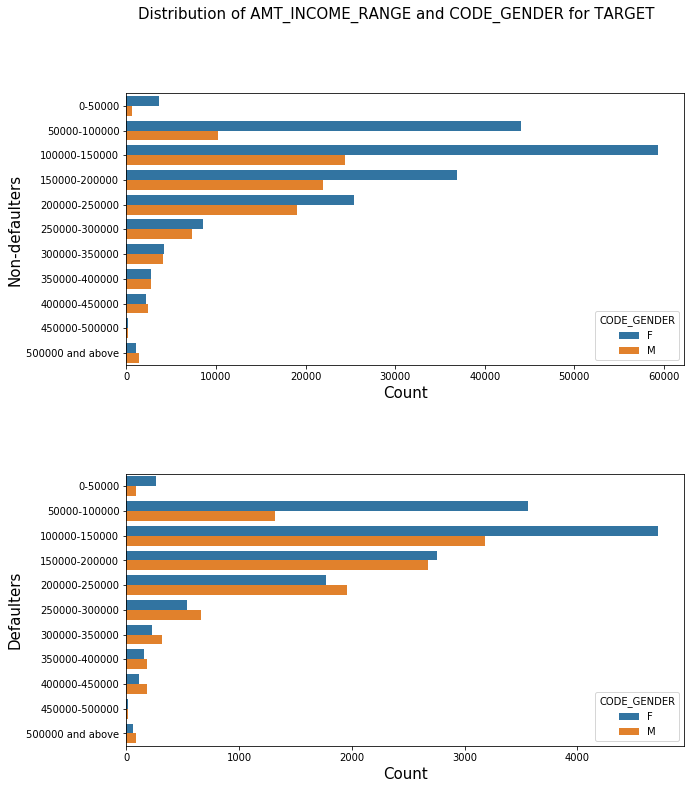

In [67]:
countplot_2cols('AMT_INCOME_RANGE', 'CODE_GENDER')

- Female counts are higher than male.
- Income range from 50000 to 250000 is having more number of credits.
- This graph show that females are more than male in having credits for that range.
- Very less count for income range 450000 and above.

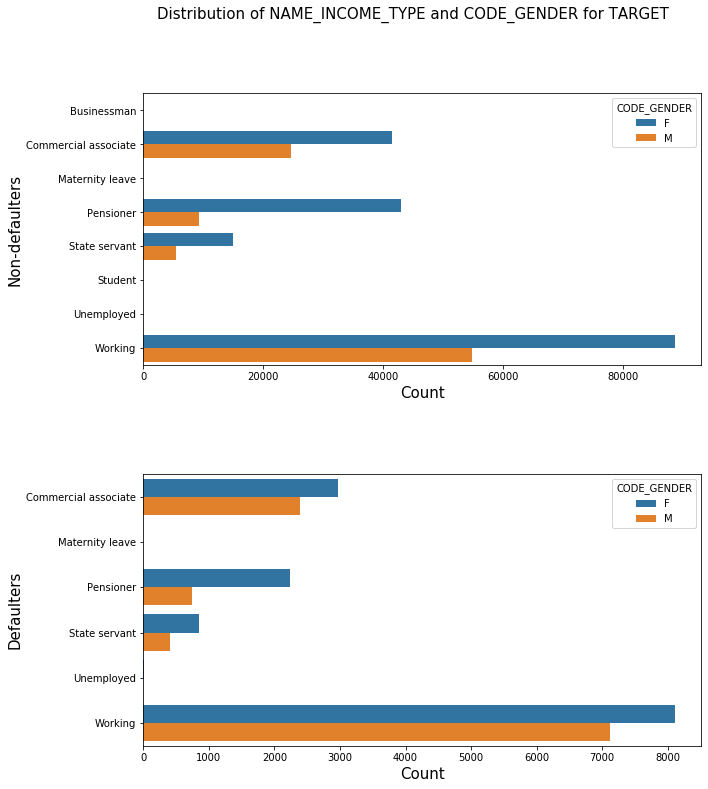

In [68]:
countplot_2cols('NAME_INCOME_TYPE', 'CODE_GENDER')

- For income type `working`, `commercial associate`, and `State Servant`, `pensioner` the number of credits are higher than others.
- For this `Females` are having more number of credits than `male`.
- Less number of credits for income type `student`, `Businessman` and `Unemployed`

In [69]:
def boxplot_2_var_with_hue(col1, col2, col3, dataframe, df_name):
    plt.figure(figsize=(16,12))
    plt.xticks(rotation=45)
    sns.boxplot(data = dataframe, x=col1, y=col2, hue=col3)
    plt.title('{} vs {} for {} with grouping by {}'.format(col1, col2, df_name, col3), fontdict = {'fontsize' : 16})
    
    plt.ylabel(col2, fontsize=15)
    plt.xlabel(col1, fontsize=15)
    plt.show()

##### AMT_CREDIT vs EDUCATION_TYPE for Non-defaulters with grouping by FAMILY_STATUS

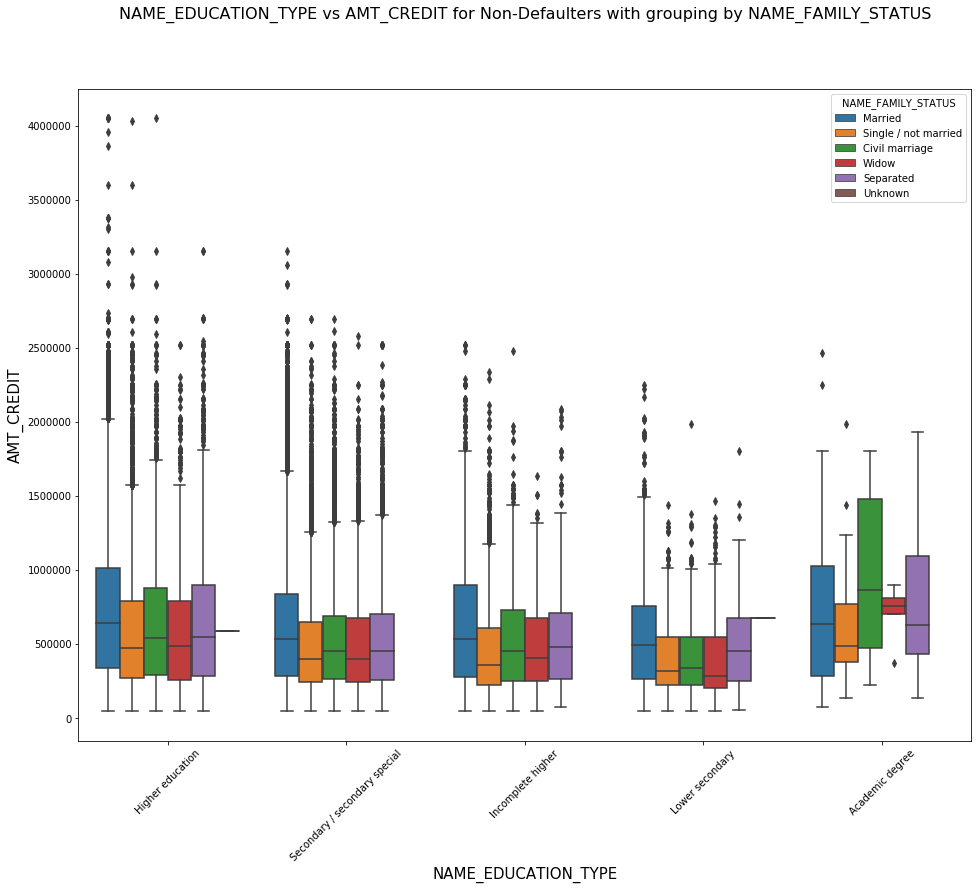

In [70]:
boxplot_2_var_with_hue('NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'NAME_FAMILY_STATUS', not_defaulted_df, 'Non-Defaulters')

- In `Academic degree` category, `AMT_CREDIT` counts are much higher for `Civil Marriage` group.
- In `Academic degree` category, `AMT_CREDIT` counts aer minimum for `Widow` group.

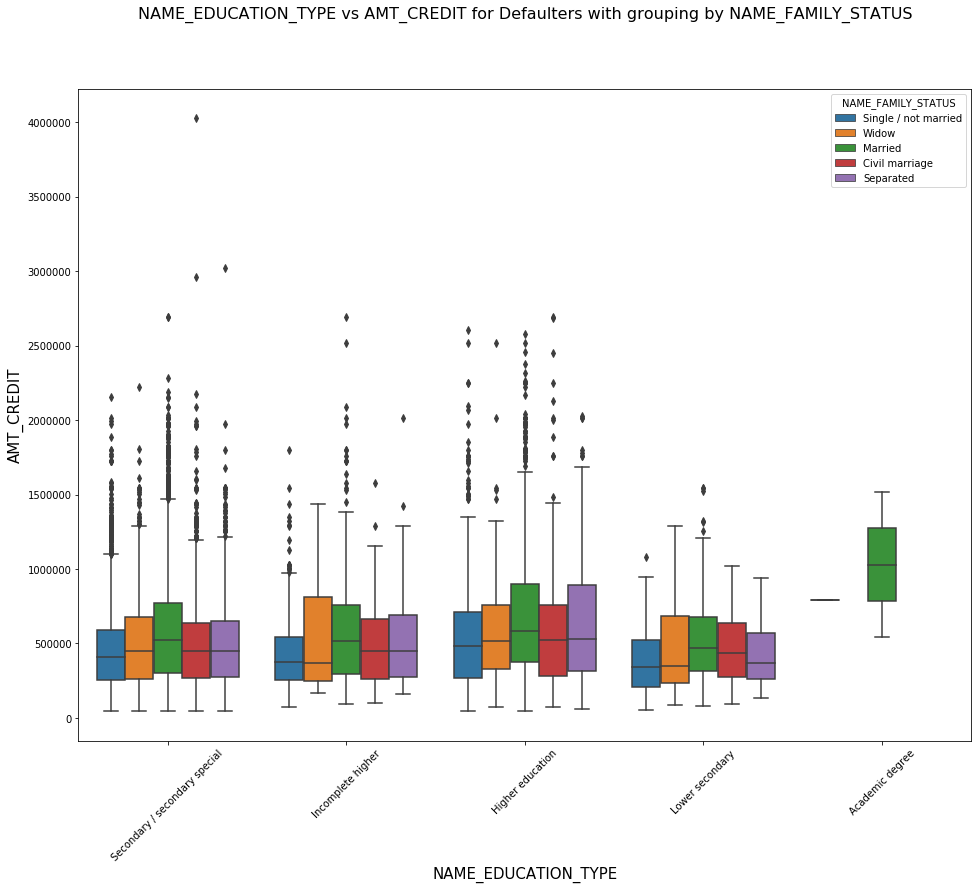

In [71]:
boxplot_2_var_with_hue('NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'NAME_FAMILY_STATUS', defaulted_df, 'Defaulters')

- In `Academics` category, only `Married` group has defaulters.
- So, bank must prefer applicants with `Academics` degree and `Non-married`.

##### Amount Annuity vs Name Education Type for Target 0 with nested grouping by Name Income Type

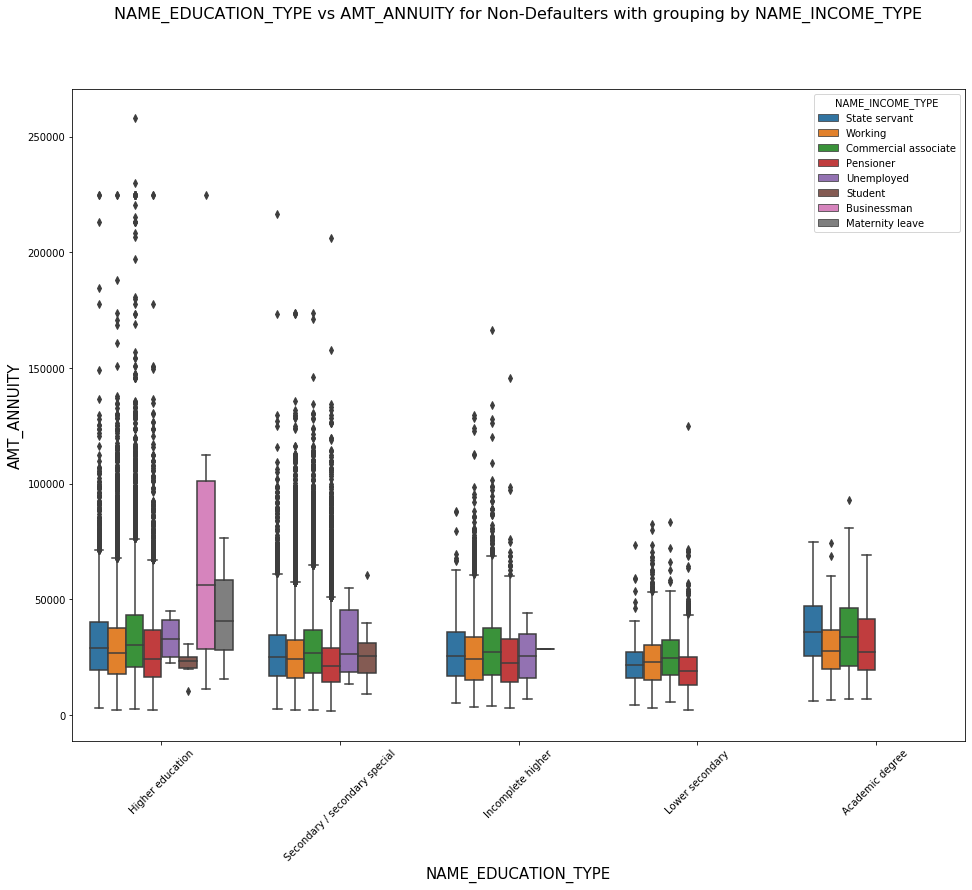

In [72]:
boxplot_2_var_with_hue('NAME_EDUCATION_TYPE', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', not_defaulted_df, 'Non-Defaulters')

- There are many applicants from `Secondary/secondary special education` type whose loan gets approved.
- `Higher Education:Businessman` , `Higher Education:Maternity leave` and `Higher Education:students` should be targeted as they pay their loan on time as per the data

##### Amount Annuity vs Name Education Type for Target 1 with nested grouping by Name Income Type

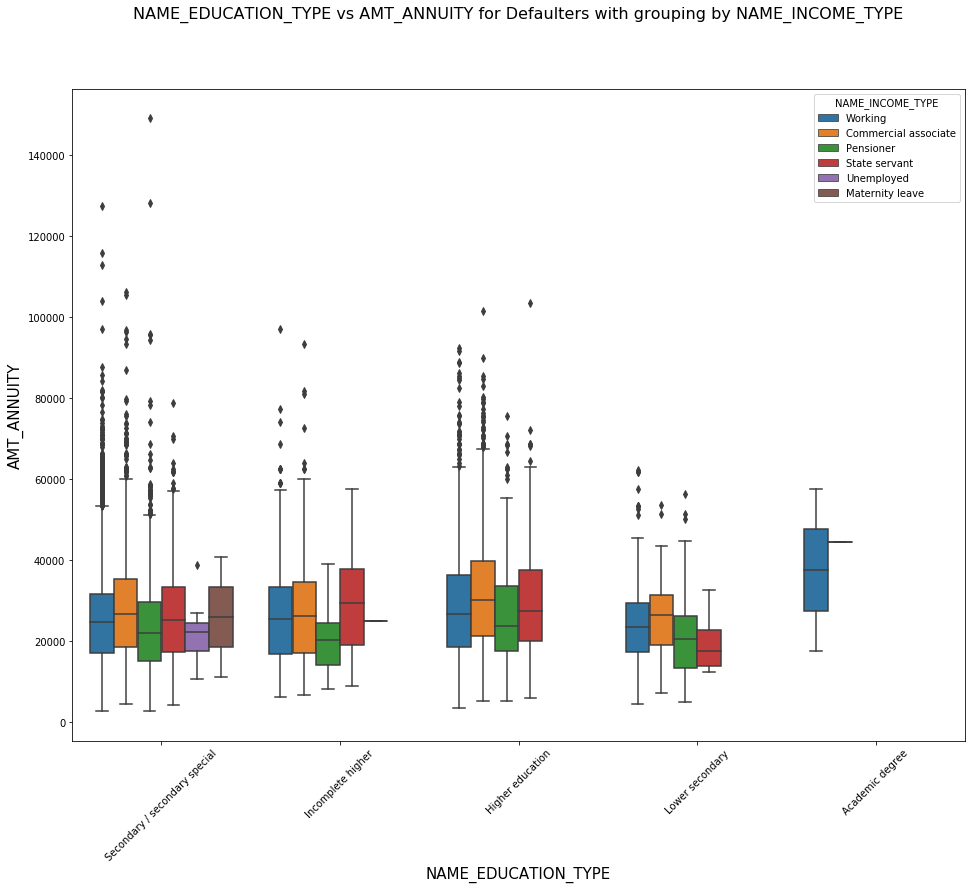

In [73]:
boxplot_2_var_with_hue('NAME_EDUCATION_TYPE', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', defaulted_df, 'Defaulters')

- Bank must focus on Academic degree Education Type non working type as they are having higher number of successful payments on time.

## Reading Previous Application dataframe

In [74]:
prev_df = pd.read_csv('previous_application.csv')

In [75]:
# Checking shape of dataframe
prev_df.shape

(1670214, 37)

In [76]:
# Checking column datatypes
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Merging the dataframes

In [77]:
prev_df.SK_ID_CURR.unique().size, prev_df.SK_ID_CURR.size

(338857, 1670214)

The `prev_df` dataframe contains multiple rows with one SK_ID_CURR column.

We'll take `inner` join to merge both dataframes, so that we have consistent dataset without any null values of either side of merge.

In [78]:
merged_df = df.merge(prev_df, how='inner', on='SK_ID_CURR', suffixes="_x")

In [79]:
merged_df.rename({
    'AMT_ANNUITY_':'AMT_ANNUITY',
    'AMT_ANNUITYx':'AMT_ANNUITY_PREV',
    'AMT_CREDIT_':'AMT_CREDIT',
    'AMT_CREDITx':'AMT_CREDIT_PREV',
    'AMT_GOODS_PRICE_': 'AMT_GOODS_PRICE',
    'AMT_GOODS_PRICEx': 'AMT_GOODS_PRICE_PREV',
    'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE',
    'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START',
    'NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
    'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
    'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'
}, axis=1, inplace=True)

###  Checking distribution/imbalance on NAME_CONTRACT_STATUS column in the merged_df

In [80]:
contract_status_value_counts = merged_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)

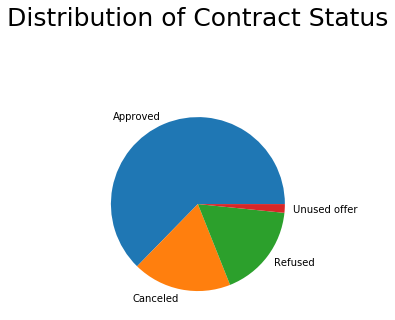

In [81]:
plt.title("Distribution of Contract Status")

contract_status_value_counts.plot.pie(
    labels=contract_status_value_counts.index, 
)
plt.ylabel('')
plt.show()

### Dividing data into 4 parts as per the CONTRACT_STATUS column

In [82]:
approved_df = merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Approved', :]
refused_df = merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Refused', :]
canceled_df = merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Canceled', :]
unused_df = merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Unused offer', :]

### Univariate Analysis

In [83]:
def visualize_plot_boxes_merged_df(column_name):

    fig, ax =plt.subplots(1,4, figsize=(10,5), sharey=True)
    plt.subplots_adjust(wspace=0.6) 
    
    sns.boxplot(y=column_name, data=approved_df, ax=ax[0])
    sns.boxplot(y=column_name, data=refused_df, ax=ax[1])
    sns.boxplot(y=column_name, data=canceled_df, ax=ax[2])
    sns.boxplot(y=column_name, data=unused_df, ax=ax[3])
    
    ax[0].set_xlabel('Approved',fontsize = 15)
    ax[1].set_xlabel('Refused',fontsize = 15)
    ax[2].set_xlabel('Canceled',fontsize = 15)
    ax[3].set_xlabel('Unused',fontsize = 15)
    
    ax[0].set_ylabel(column_name,fontsize = 15)
    ax[1].set_ylabel(column_name,fontsize = 15)
    ax[2].set_ylabel(column_name,fontsize = 15)
    ax[3].set_ylabel(column_name,fontsize = 15)
    
    fig.suptitle('Distribution of {} across CONTRACT_STATUS'.format(column_name), fontsize=18)
    plt.show()

##### Continuous Variables

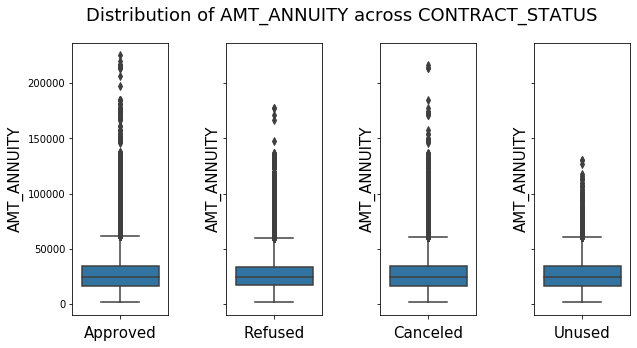

In [84]:
visualize_plot_boxes_merged_df('AMT_ANNUITY')

- No strong comparison visible in `AMT_ANNUITY` with the `CONTRACT_STATUS` variable
- `Refused` & `Unused` have comparitively lesser Outliers count than the `Approved` & `Canceled`

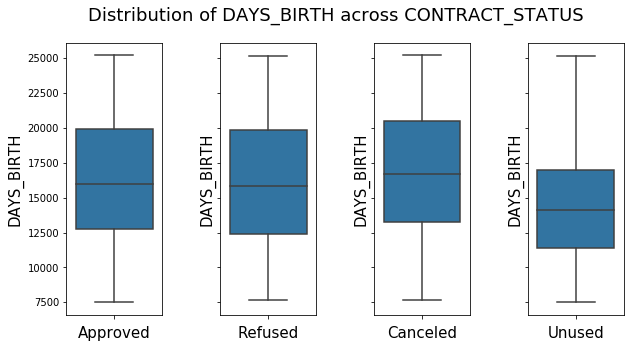

In [85]:
visualize_plot_boxes_merged_df('DAYS_BIRTH')

- `Unused` loans have in general lesser `DAYS_BIRTH`, i.e, younger clients are often constituting `Unused loans`  

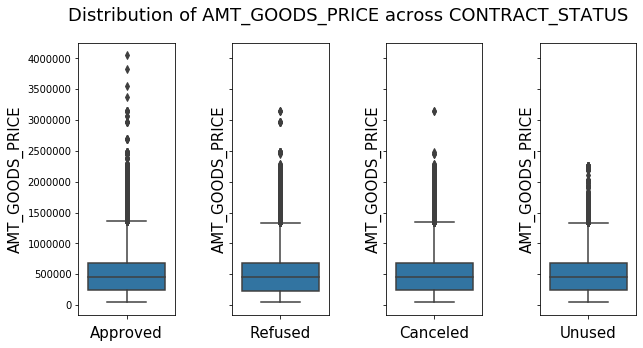

In [86]:
visualize_plot_boxes_merged_df('AMT_GOODS_PRICE')

- There is no strong relationship between `AMT_GOODS_PRICE` and `CONTRACT_STATUS`

##### Categorical Variables

In [87]:
def visualize_categorical_merged_df(column_name):
    
    fig, ax =plt.subplots(4,1, figsize=(8,12))
    plt.subplots_adjust(hspace=0.4) 
    
    sns.countplot(y=column_name, data=approved_df.sort_values(column_name), ax=ax[0])
    sns.countplot(y=column_name, data=refused_df.sort_values(column_name), ax=ax[1])
    sns.countplot(y=column_name, data=canceled_df.sort_values(column_name), ax=ax[2])
    sns.countplot(y=column_name, data=unused_df.sort_values(column_name), ax=ax[3])
    
    ax[0].set_xlabel('Approved',fontsize = 13)
    ax[1].set_xlabel('Refused',fontsize = 13)
    ax[2].set_xlabel('Canceled',fontsize = 13)
    ax[3].set_xlabel('Unused',fontsize = 13)
    
    ax[0].set_ylabel(column_name,fontsize = 13)
    ax[1].set_ylabel(column_name,fontsize = 13)
    ax[2].set_ylabel(column_name,fontsize = 13)
    ax[3].set_ylabel(column_name,fontsize = 13)
    
    fig.suptitle('Distribution of {} vs CONTRACT_STATUS'.format(column_name), fontsize=15)
    plt.show()

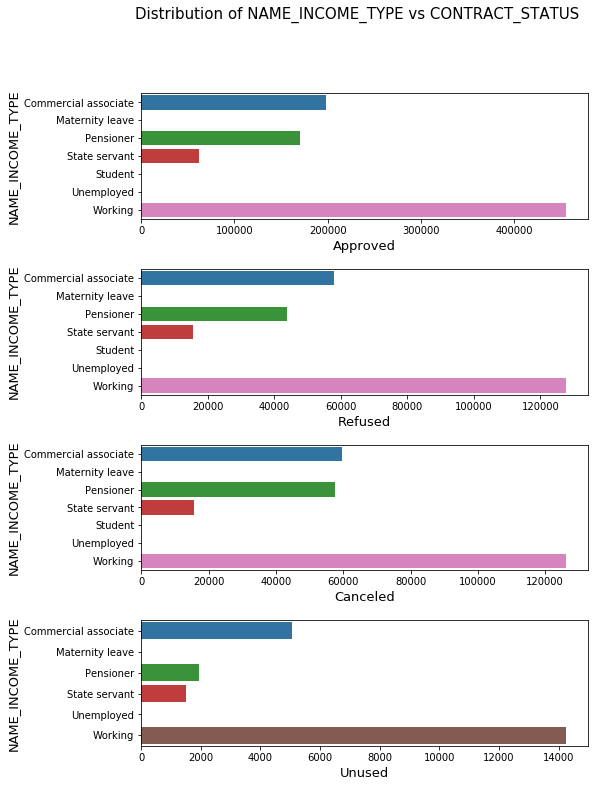

In [88]:
visualize_categorical_merged_df('NAME_INCOME_TYPE')

- In `Canceled` category, there is a huge difference in income type `Pensioner` & `State servant`

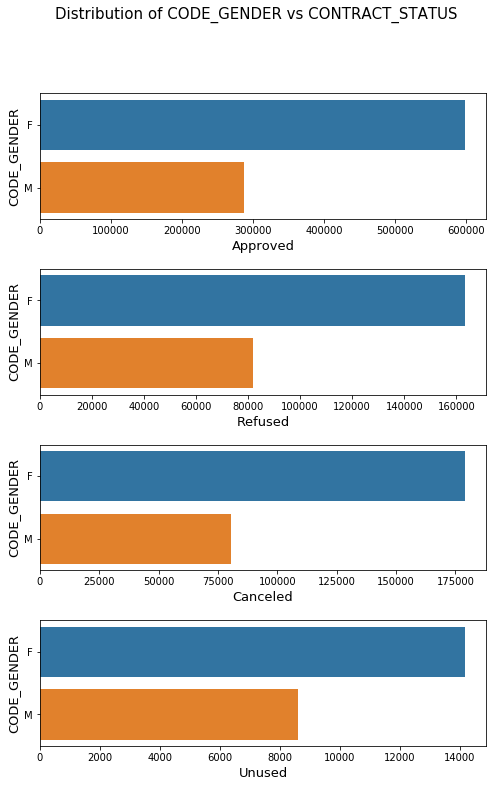

In [89]:
visualize_categorical_merged_df('CODE_GENDER')

- `Males` have considerably lesser counts in `Canceled` category as compared to `Females`

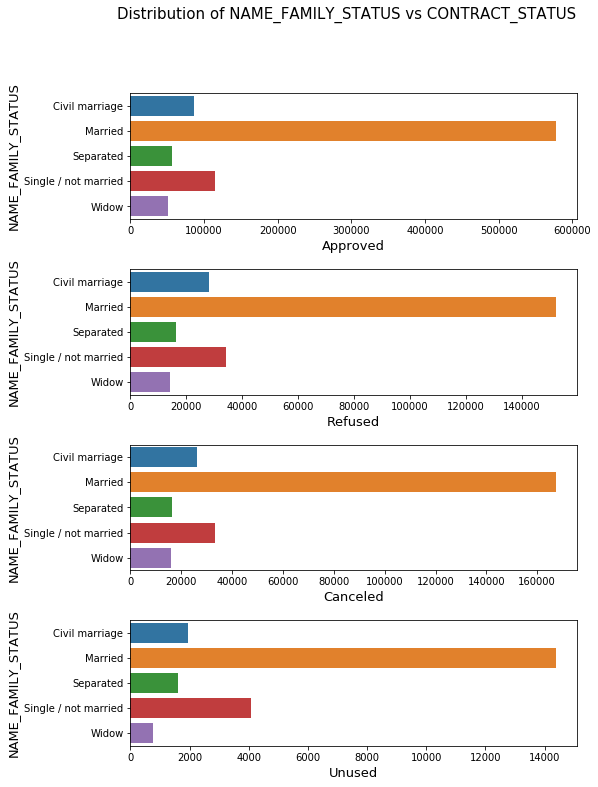

In [90]:
visualize_categorical_merged_df('NAME_FAMILY_STATUS')

- Married people are at top in all `CONTRACT_STATUS` categories.
- `Single/Not-married` ratio is comparitively higher in `Unused` category.

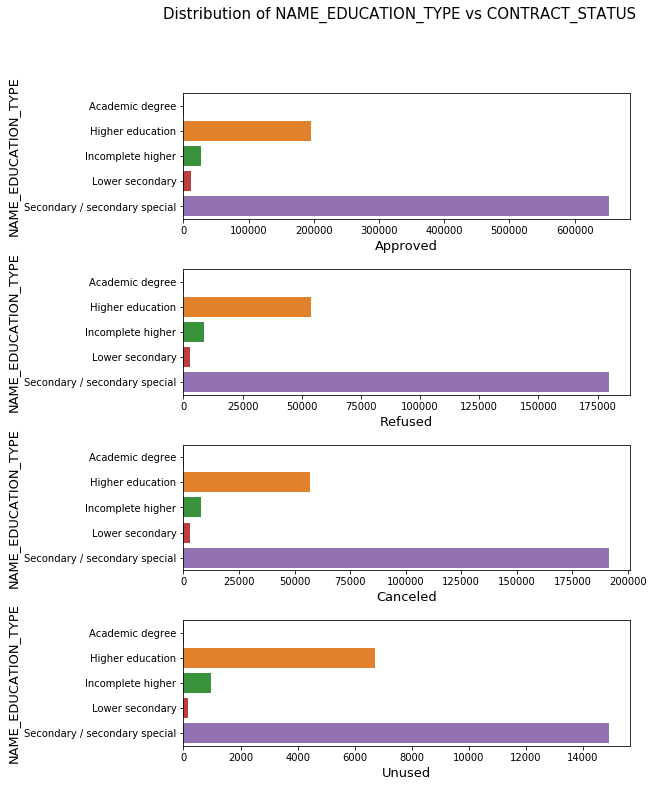

In [91]:
visualize_categorical_merged_df('NAME_EDUCATION_TYPE')

- `Higher Education` ratio is comparitively more in `Unused` category.

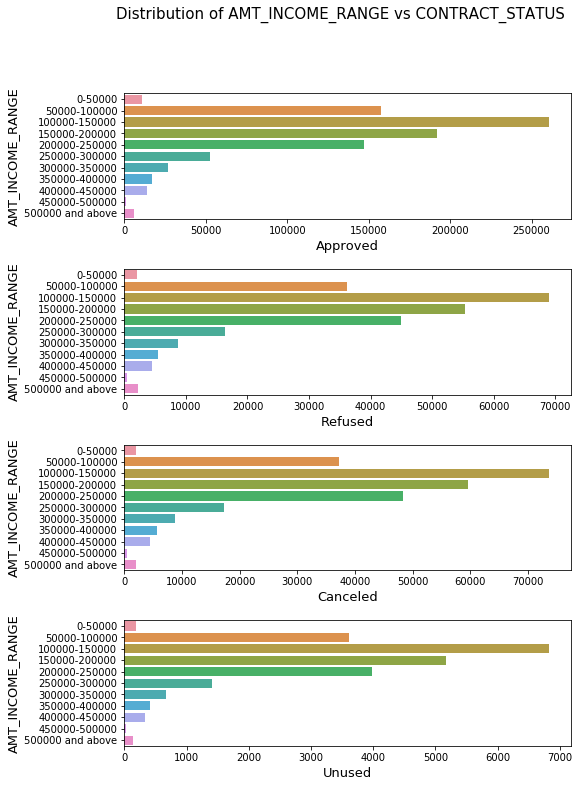

In [92]:
visualize_categorical_merged_df('AMT_INCOME_RANGE')

- There is no strong relationship between INCOME_RANGE and CONTRACT_STATUS

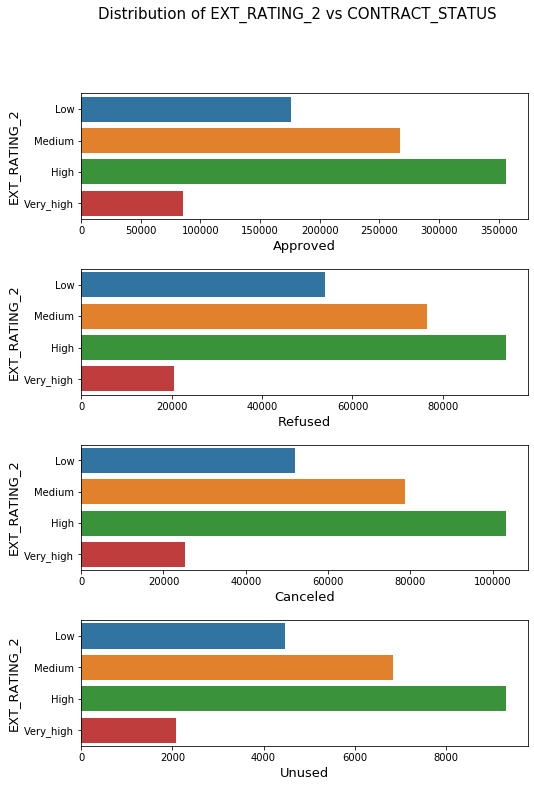

In [93]:
visualize_categorical_merged_df('EXT_RATING_2')

- `Approved` category has the highest `HIGH` category in `EXT_RATING` column

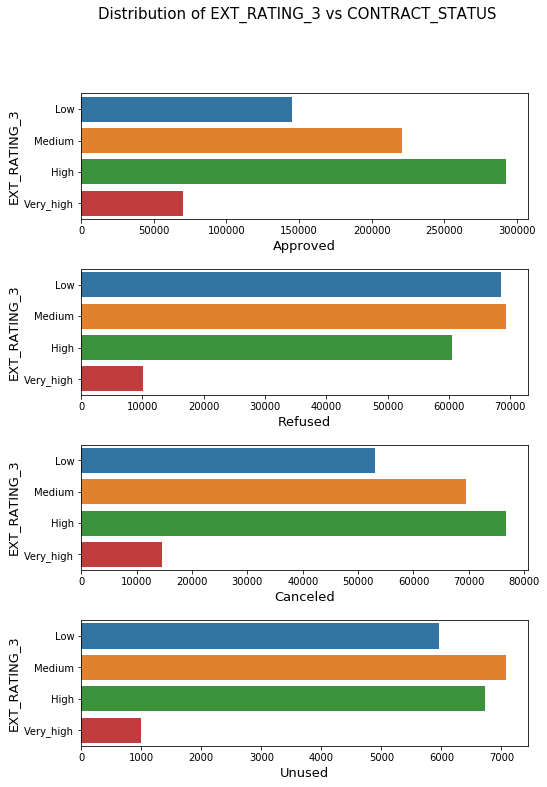

In [94]:
visualize_categorical_merged_df('EXT_RATING_3')

- There is clear distinction in the `LOW` values of `EXT_RATING_3` in `Approved` category vs other categories.

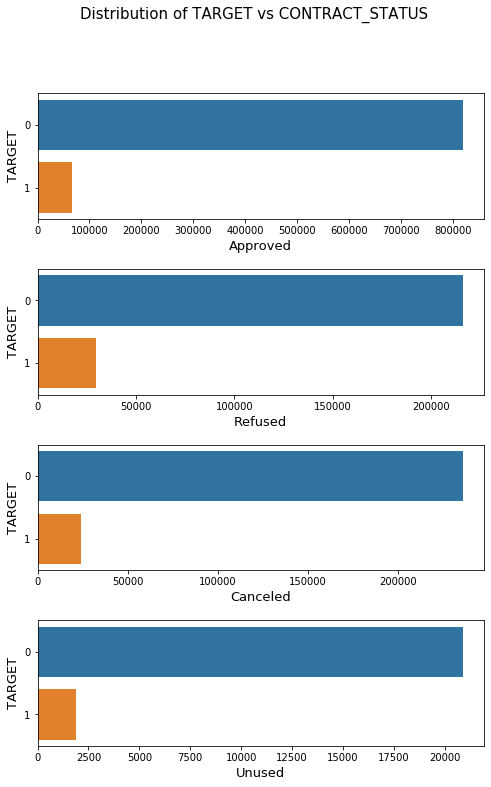

In [95]:
visualize_categorical_merged_df('TARGET')

- Loans which were previous `Refused` or `Cancelled` have higher `default` rate.

### Bivariate Analysis

##### Visualizing CONTRACT STATUS with Loan Purpose

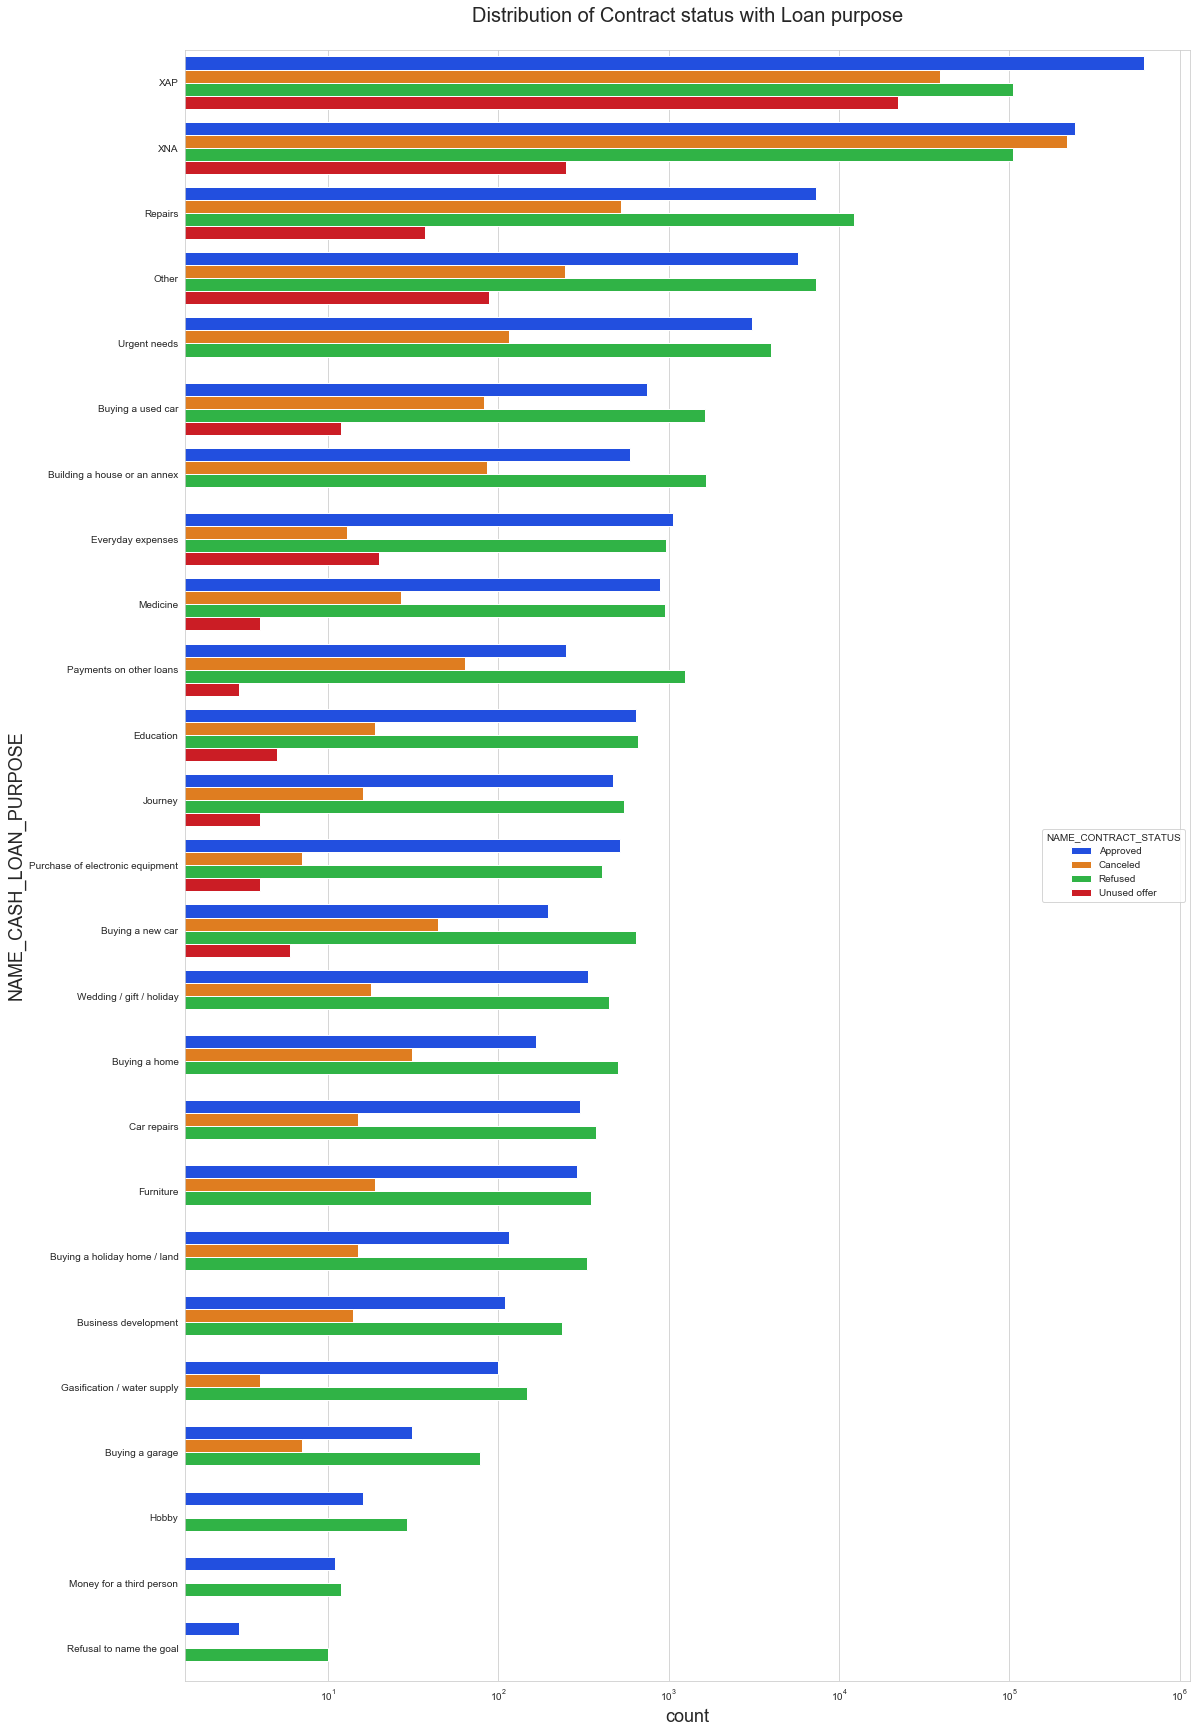

In [96]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,30))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 28
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xscale('log')
plt.title('Distribution of Contract status with Loan purpose')

ax = sns.countplot(
    data = merged_df, y='NAME_CASH_LOAN_PURPOSE', 
    order = merged_df.NAME_CASH_LOAN_PURPOSE.value_counts().index, 
    hue = 'NAME_CONTRACT_STATUS',
    palette='bright'
)

sns.set(font_scale=2)

plt.show()

- `Repairs` have most reject loans.
- In `Medicines` we have almost equal number of approved & rejected loans
- In `Education` we have almost equal number of approved & rejected loans
- `Paying other loans` and `buying a new car` is having significant higher rejection than approves.

##### Visualizing Contract Status with Target

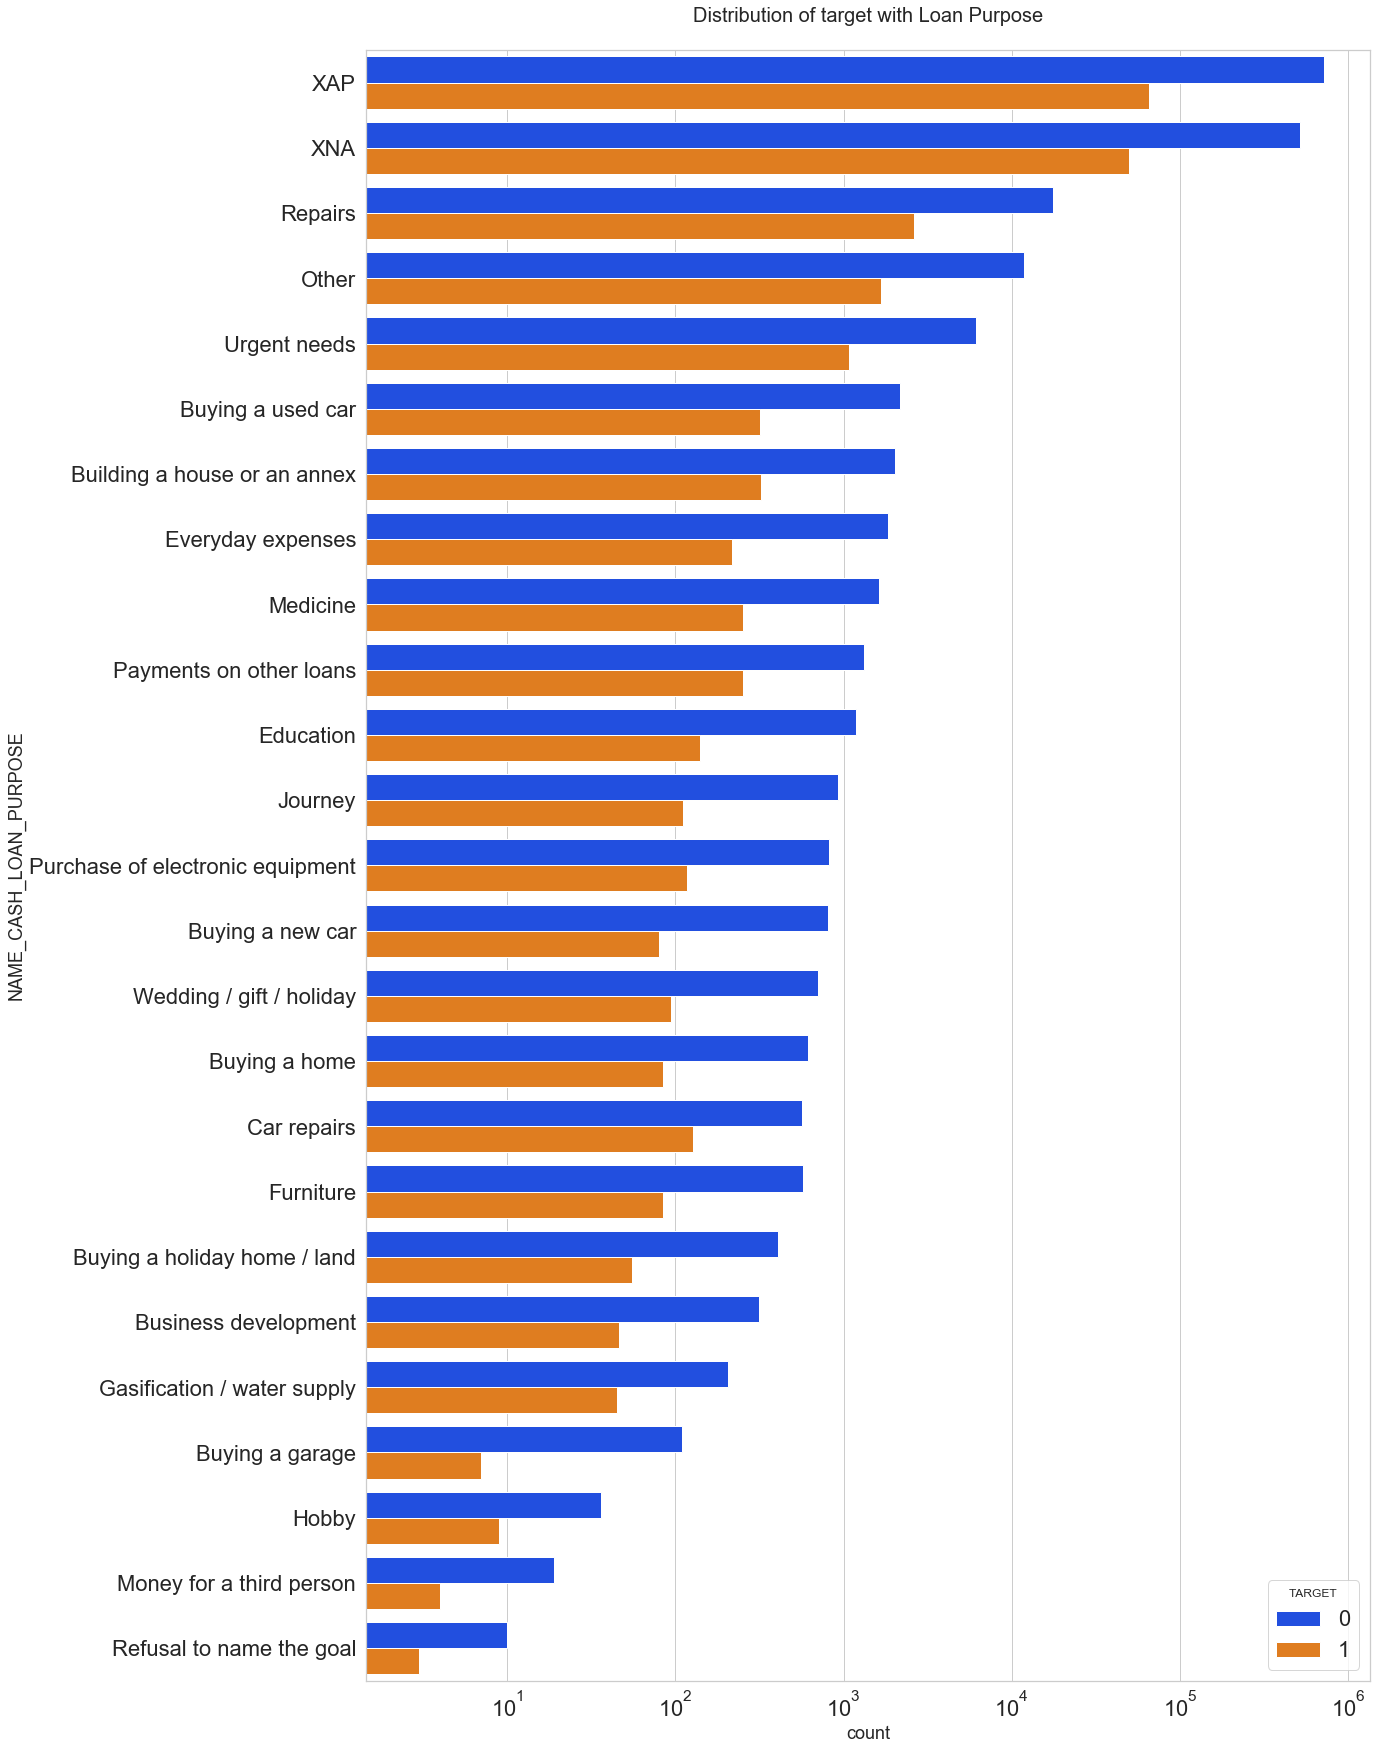

In [97]:
sns.set_style('whitegrid')

plt.figure(figsize=(18,30))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 28
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.xscale('log')
plt.title('Distribution of target with Loan Purpose')

ax = sns.countplot(
    data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', 
    order=merged_df.NAME_CASH_LOAN_PURPOSE.value_counts().index,
    hue = 'TARGET',
    palette='bright'
)

sns.set(font_scale=2)

plt.show()

- `Repairs` have considerably high count of `defaulters`.
- `Buying a garage` has comparitively lesser `defaulters` and more `non-defaulters`.
- Other loan purposes where `non-defaulters` count are significantly greater then the `defaulter` count are - `Business Development`, `Buying a home`, `Buying a land`, `Buying a new car`.

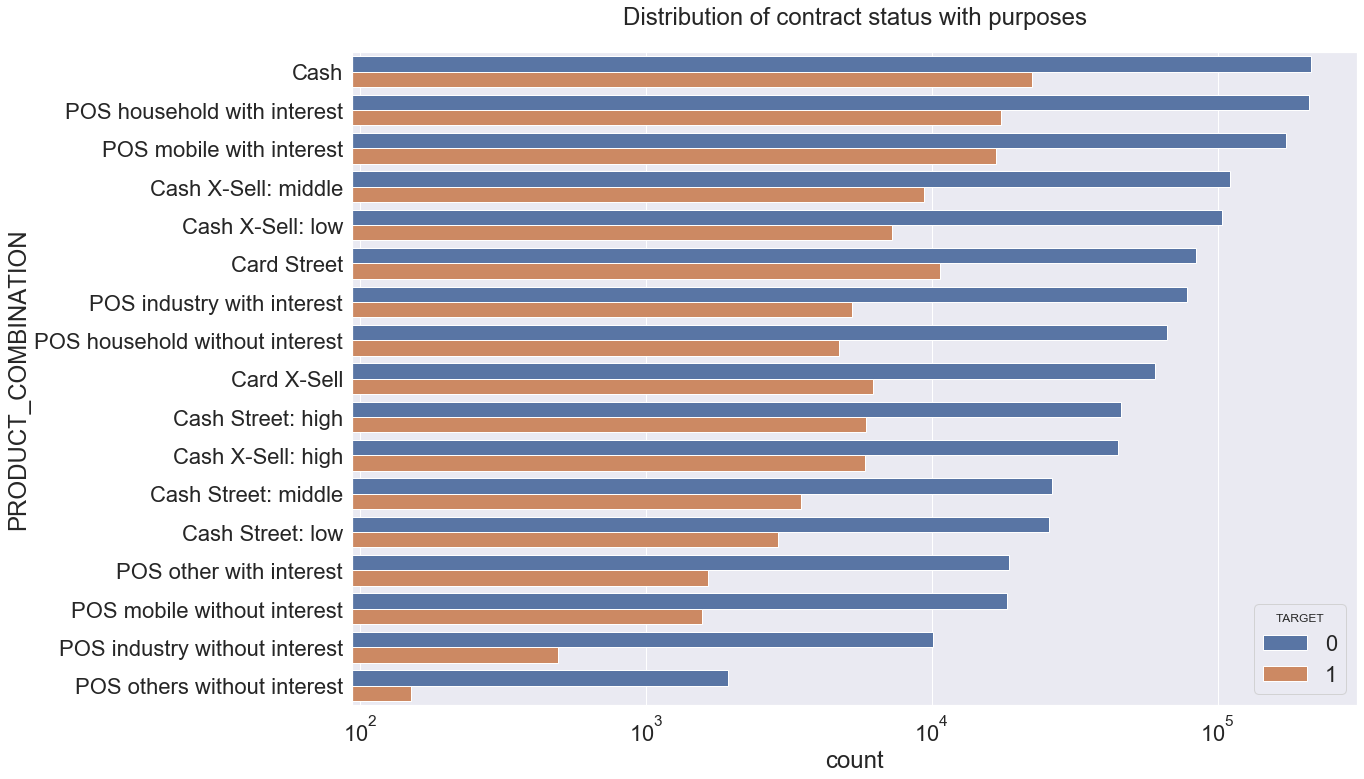

In [98]:
plt.figure(figsize=(18,12))
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
sns.countplot(data = merged_df, y= 'PRODUCT_COMBINATION', 
                   order=merged_df['PRODUCT_COMBINATION'].value_counts().index,hue ="TARGET")
plt.show()

- POS others without interest, POS industry without interest Product combinations should be targeted as their defaulter percentage is low compared to others. 
- Highest defaulter rate is for Product combination cash and highest non-defauters are also from Cash product combination. This may be because Cash combination count is high in our data set.

##### Visualizing Credit amount with Loan Purpose

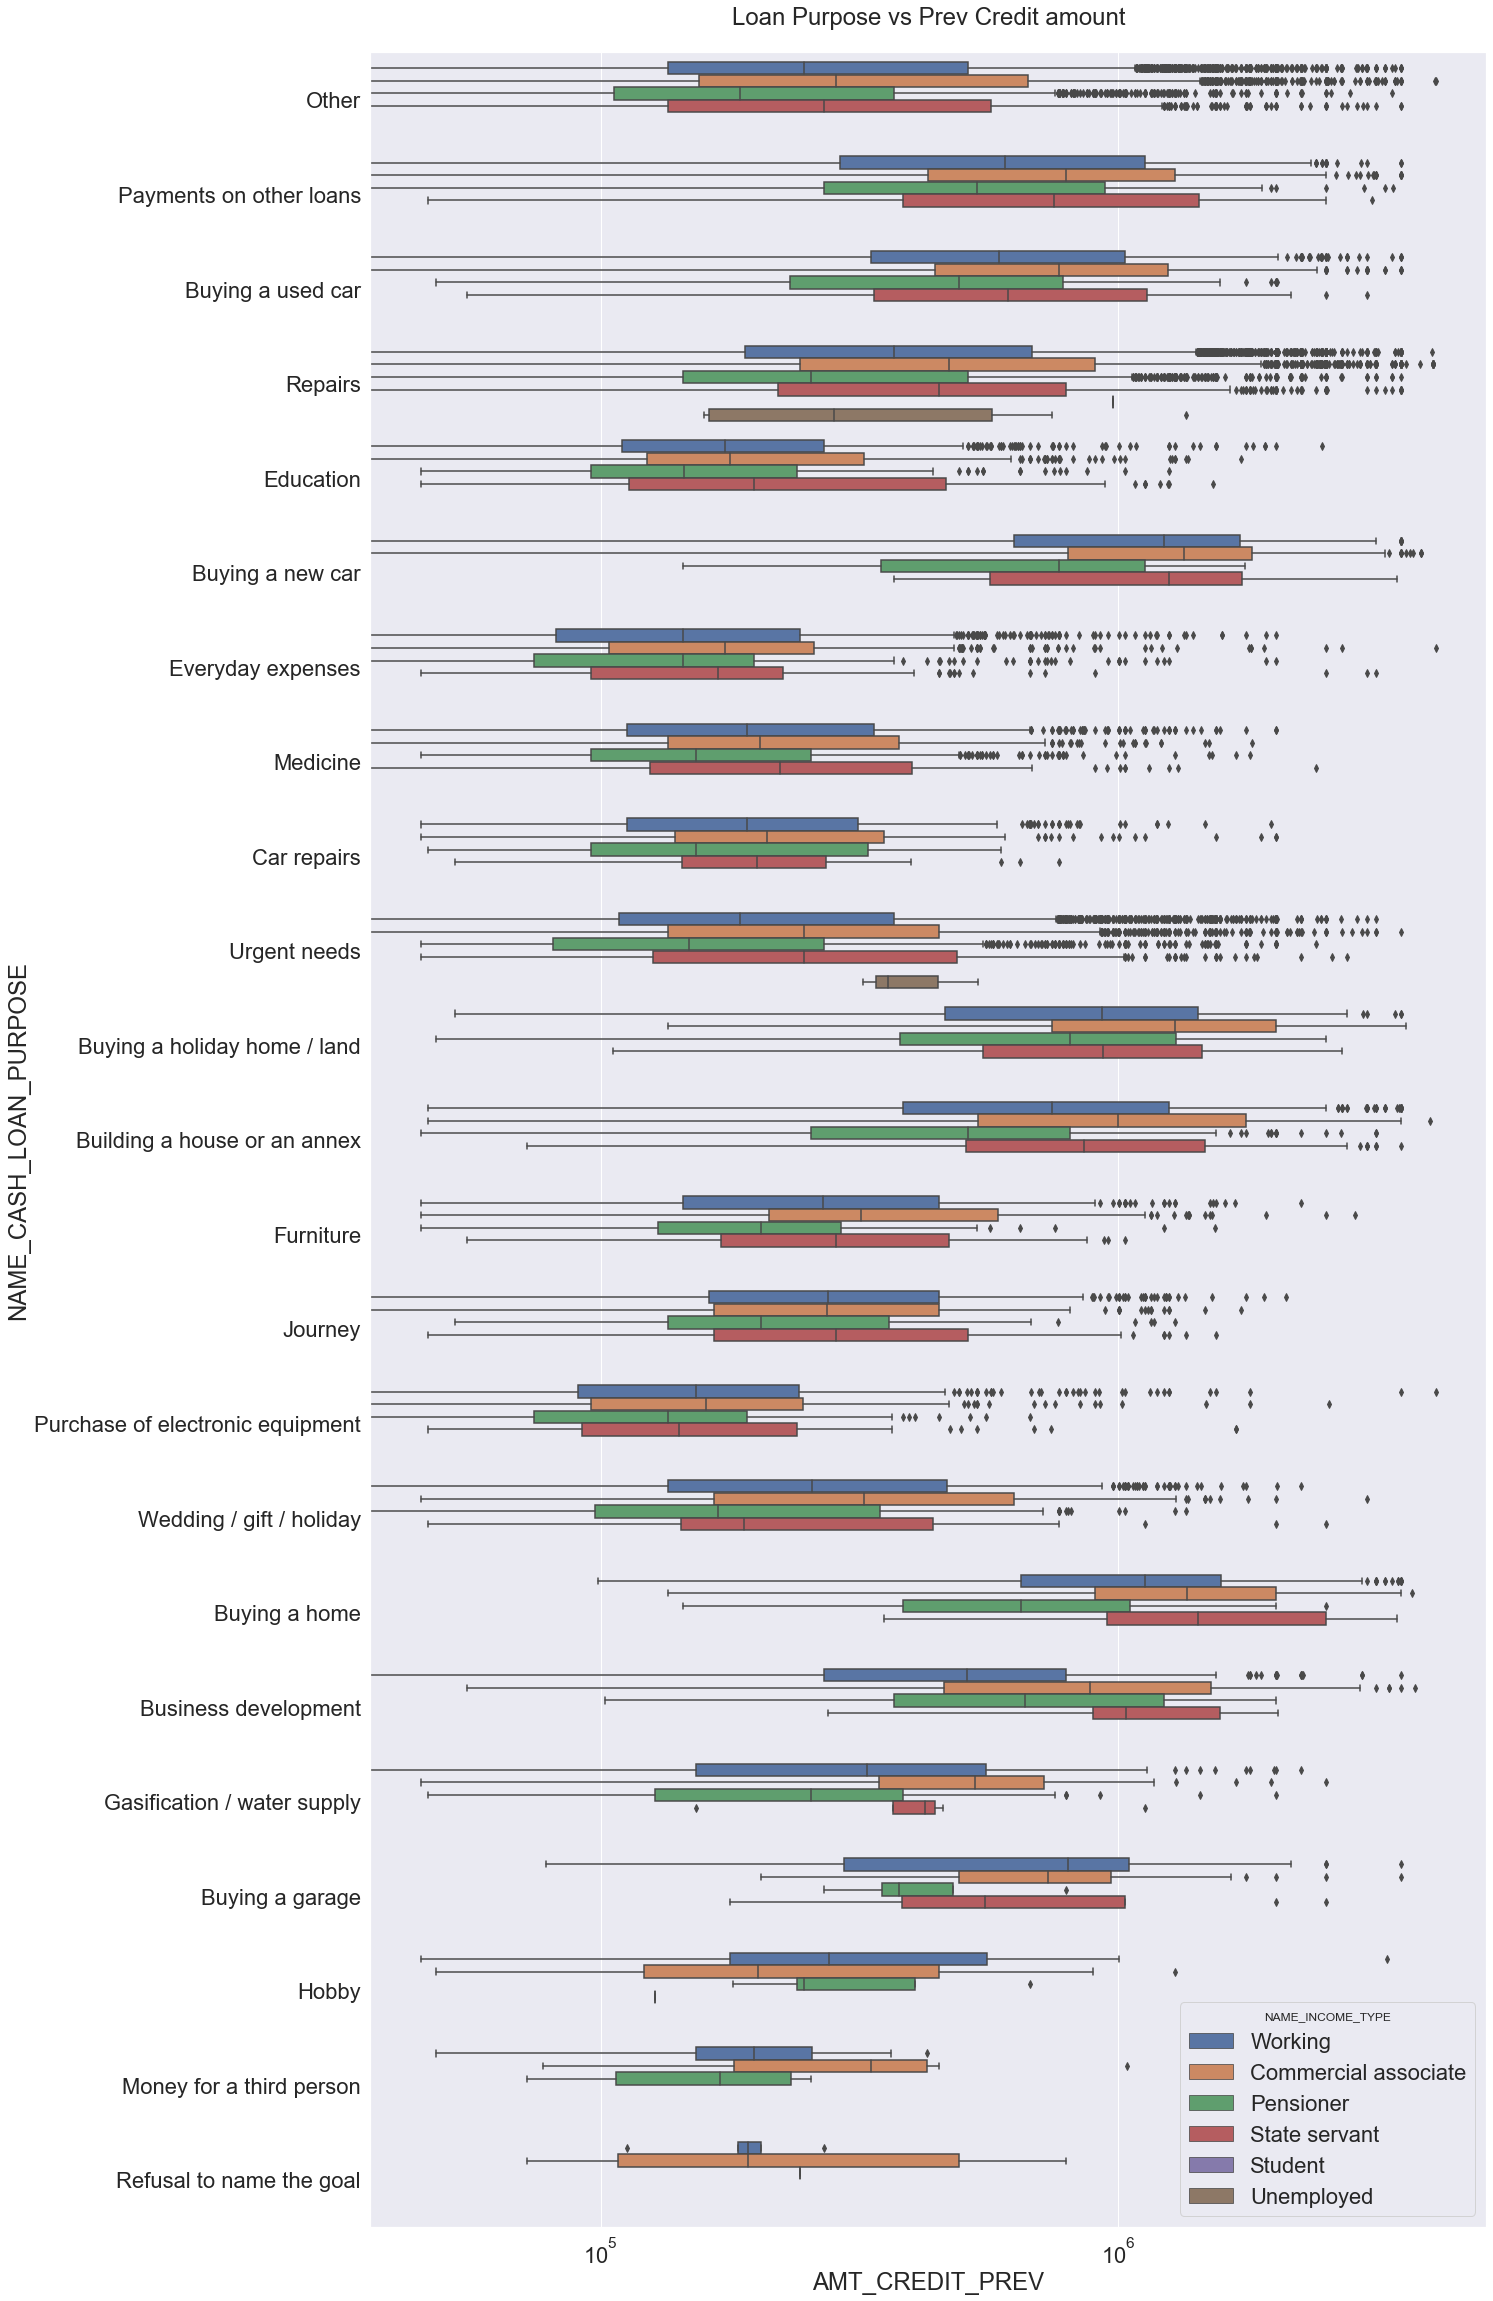

In [99]:
plt.figure(figsize=(20,40))
plt.xscale('log')

plt.tick_params(axis='both', which='minor', labelsize=8)
sns.boxplot(
    data=merged_df[~merged_df.NAME_CASH_LOAN_PURPOSE.isin(['XNA', 'XAP'])], 
    x='AMT_CREDIT_PREV', y='NAME_CASH_LOAN_PURPOSE',
    hue='NAME_INCOME_TYPE',
)

sns.set(font_scale=2)
plt.title('Loan Purpose vs Prev Credit amount')
plt.show()

- Loan purposes like `Buying a home`, `Buying a land`, `Buying a new car`, `Business development`, `Building a house` have in general higher Loan Amount requirements.
- `Commercial Associates` are the ones who have the most `AMT_CREDIT` for the loan purpose `Money for a third person`.
- In loan purpose with no reason/name, i.e. `Refusal to name the goal`, `Commercial Associates` have high `AMT_CREDIT` value. 
- `State servants` have in general significantly high AMT_CREDITS across various LOAN PURPOSES.


##### AMT_Credit vs NAME_EDUCATION_TYPE grouped by TARGET

In [100]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'EXT_RATING_2', 'EXT_RATING_3', 'CNT_FAM_MEMBERS_RANGE',
       'CNT_CHILDREN_RANGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_PREV',
       'AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV',
       'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_PREV',
       'WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PROCESS_START_PREV',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFL

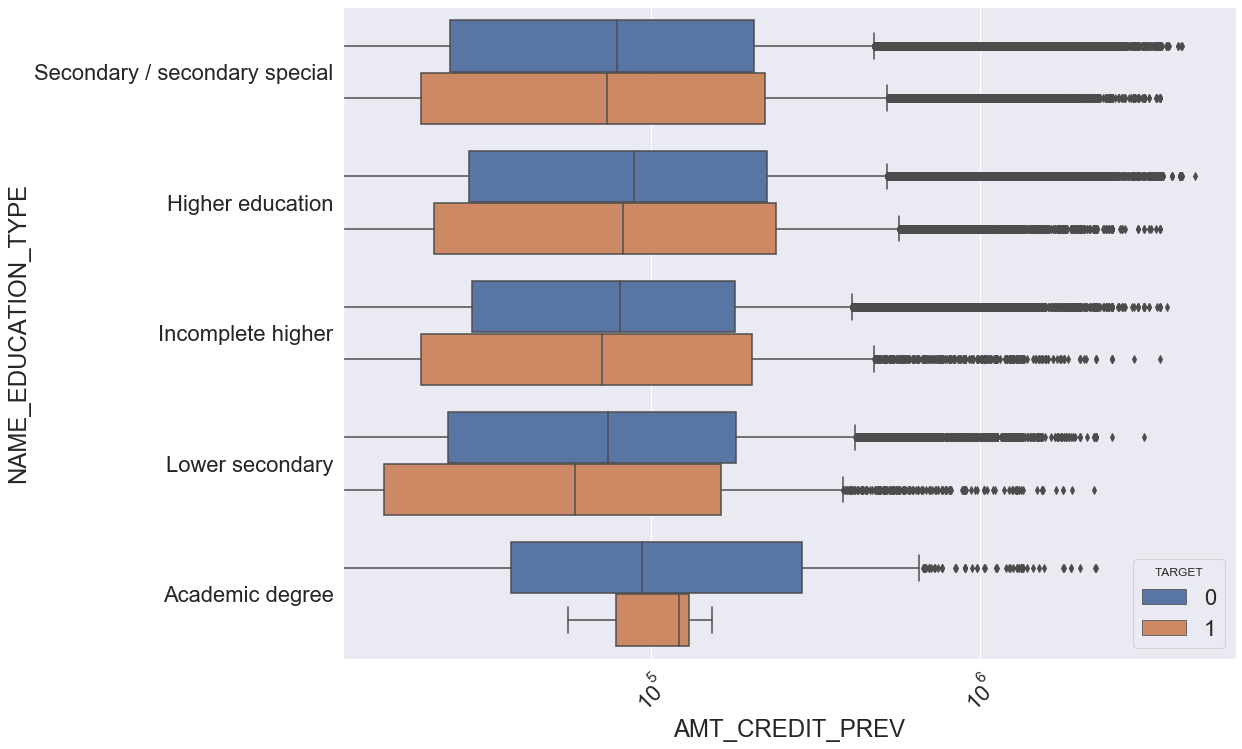

In [101]:
plt.figure(figsize=(16,12))
plt.xscale('log')
plt.xticks(rotation=45)
sns.boxplot(data =merged_df, x='AMT_CREDIT_PREV', y='NAME_EDUCATION_TYPE', hue='TARGET',orient='h')
plt.show()

- Applicants with `Academic degree` should be targeted as they have very less payment dues.

##### Visualizing Credit amount prev with Housing type

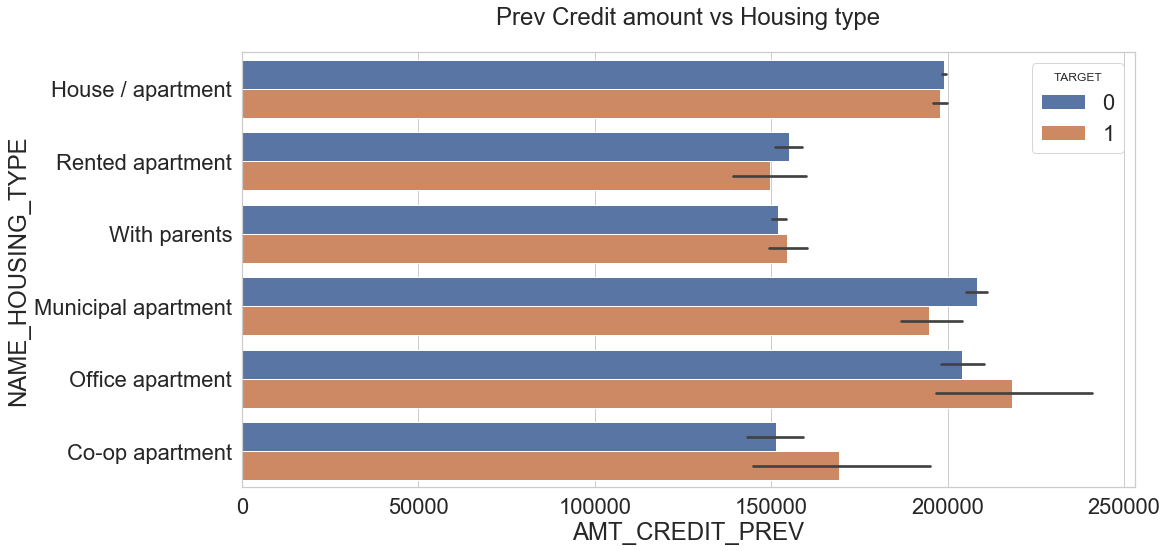

In [102]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.barplot(
    data =merged_df, 
    x='AMT_CREDIT_PREV', y='NAME_HOUSING_TYPE',
    hue='TARGET',
)
plt.title('Prev Credit amount vs Housing type')
plt.show()

- `Office apartment`, `Co-op apartment` have higher AMT_CREDIT for `defaulters`.
- `Municipal apartment` have higer AMT_CREDIT for `non-defaulters`
- So, banks can focus on giving loans to `House/apartment`, `Municipal Apartments`, as they show positive results being non-defaulters.

## Conclusion

- `Higher Education:Businessman`, `Higher Education:Maternity leave` and `Higher Education:students` should be targeted as they pay their loan on time as per the data.


- Bank must focus on `Academic degree` Education Type non working type as they are having higher number of successful payments on time.


- Loan purpose `Repair` is having higher number of unsuccessful payments on time.


- `Buying a garage`, `Business developemt`, `Buying land`, `Buying a new car` and `Education` should be targeted as they are having minimum payment difficulties.


- `POS others without interest`, `POS industry without interest` Product combinations should be targeted as their defaulter percentage is low compared to others.


- Banks can focus on giving loans to `House/apartment`, `Municipal Apartments`, as they show positive results being non-defaulters.